## Darian Gurrola
## Course Instructor: Daniel Smith

## A. Research Question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As the digital media landscape continues to grow and evolve, organizations must use any available resource to gain an advantage over the competition.  Digital media companies, such as Mashable, rely heavily on third party advertising and affiliate linking to generate revenue.  Concurrently, advertisers are willing to pay large sums of money to access the audiences that those digital media companies have cultivated (Miles, 2020).  In addition to traditional forms of advertising, brands are also employing methods such as sponsored content and native ads to draw the attention of consumers of digital media.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The question being investigated in this analysis is "To what extent do the number of words in an article title, the number of words in an article, the number of links in an article, the number of keywords in the metadata, and the text sentiment polarity of an article influence the number of shares an online news article receives?"  This research question is being investigated because of its business applications in the digital media space.  By understanding what factors drive reader engagement, digital media companies will be able to maximize their advertising revenue. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The null hypothesis of this analysis is that the variables "n_tokens_title", "n_tokens_content", "num_hrefs", "num_keywords", and "global_sentiment_polarity" do not have a statistically significant effect on "shares".  The alternative hypothesis is that the variables "n_tokens_title", "n_tokens_content", "num_hrefs", "num_keywords", and "global_sentiment_polarity" have a statistically significant effect on "shares".

## B. Data Collection

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this analysis, I used the online news popularity dataset from the UC Irvine Machine Learning repository.  This dataset summarizes a set of features about articles published by Mashable in a period of two years (Fernandes et al., 2015). It contains 58 features and 39,727 observations. One advantage of gathering data through this source is that it contains a wide variety of free datasets that are available for public use.  The repository also allows users to filter for datasets designed for tasks such classification, clustering, and regression.  This made it quite easy to find a dataset related to my interest.  One disadvantage, however, is that many of the datasets are small and do not have enough observations to meet the capstone requirements. Overally, it was not very challenging to find a dataset to use for multiple linear regression. 

## C.  Data Extraction and Preparation

### Tools

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For this analysis, I used Python within the Jupyter Notebooks environment.  I chose Python for this analysis because it has a wide variety of libraries that are suited for performing data exploration, data cleaning, and regression.  I also used a jupyter notebook environment for this analysis because it has an intuitive interface and allows me to organize my observations as I conduct the analysis.  I felt that these tools were the best combination for creating the model and documenting my findings. One disadvantage, however, is that python is slower than other languages, particularly when working with large amounts of data.  This was apparent when generating visualizations during the data exploration and cleaning phases.  Thankfully, it did not impede the analysis in any meaningful way.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As I mentioned previously, one of the advantages of python is extensive amount of libraries that are available.  I used pandas to manipulate the data, numpy to perform calculations, seaborn and matplotlib to create visualizations, and statsmodels to build the actual linear regression model.  These tools all played an important role in preparing the data for linear regression.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Extraction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step was to import my chosen dataset.  To do this, I used the "read_csv()" function from the pandas library and imported the the data from my csv file into a dataframe called "df".  

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")

### Data Exploration 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After importing the initial dataset, I inspected it by using the "head()", "describe()", and "info()" methods on "df".  Based on the output, we can see that the initial dataset contains 59 variables and 39,644 observations.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using the "columns" attribute of "df", I noticed that many column names contained unnecessary whitespace.  I decided to remove the whitespace to prevent any potential errors when selecting variables. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the initial list of variables, I decided to remove those that seemed redundant or irrelevant. For example, the initial dataset includes several variables indicating the day of the week an article was published, with each day variable containing a value of 1 or 0 similar to a dummy variable resulting from one-hot encoding. To avoid redundancy, I removed the variable "weekday_is_sunday," which essentially functions as a base category. Removing unnecessary variables is crucial because they can negatively impact model accuracy, particularly if these features are highly collinear.  I decided to move my chosen features to a new dataframe called "df_news".  

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
#Remove whitespace from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

### List of Independent Variables Selected for Analysis

<ul>
    <li>n_tokens_title: Number of words in the title</li>
<li>n_tokens_content: Number of words in the content</li>
<li>n_unique_tokens: Rate of unique words in the content</li>
<li>n_non_stop_words: Rate of non-stop words in the content</li>
<li>num_hrefs: Number of links</li>
<li>num_imgs: Number of images</li>
<li>num_videos: Number of videos</li>
<li>average_token_length: Average length of the words in the content</li>
<li>num_keywords: Number of keywords in the metadata</li>
<li>data_channel_is_lifestyle: Is data channel 'Lifestyle'?</li>
<li>data_channel_is_entertainment: Is data channel 'Entertainment'?</li>
<li>data_channel_is_bus: Is data channel 'Business'?</li>
<li>data_channel_is_socmed: Is data channel 'Social Media'?</li>
<li>data_channel_is_tech: Is data channel 'Tech'?</li>
<li>kw_avg_avg: Avg. keyword (avg. shares)</li>
<li>self_reference_avg_sharess: Avg. shares of referenced articles in Mashable</li>
<li>weekday_is_monday: Was the article published on a Monday?</li>
<li>weekday_is_tuesday: Was the article published on a Tuesday?</li>
<li>weekday_is_wednesday: Was the article published on a Wednesday?</li>
<li>weekday_is_thursday: Was the article published on a Thursday?</li>
<li>weekday_is_friday: Was the article published on a Friday?</li>
<li>weekday_is_saturday: Was the article published on a Saturday?</li>
<li>global_subjectivity: Text subjectivity</li>
<li>global_sentiment_polarity: Text sentiment polarity</li>
<li>global_rate_positive_words: Rate of positive words in the content</li>
<li>global_rate_negative_words: Rate of negative words in the content</li>
<li>avg_positive_polarity: Avg. polarity of positive words</li>
<li>avg_negative_polarity: Avg. polarity of negative  words</li>
<li>title_subjectivity: Title subjectivity</li>
<li>title_sentiment_polarity: Title polarity</li>
<li>abs_title_subjectivity: Absolute subjectivity level</li>
<li>abs_title_sentiment_polarity: Absolute polarity level</li>
<li>shares: Number of shares (target)</li>
<ul>

In [8]:
#Move selected variables to df_news dataframe
df_news = df[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','num_hrefs','num_imgs',
              'num_videos','average_token_length','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_positive_polarity','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity','shares']]

In [9]:
df_news.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,10.883690,4.544143,1.249874,4.548239,7.223767,0.052946,...,0.119309,0.039625,0.016612,0.353825,-0.259524,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,11.332017,8.309434,4.107855,0.844406,1.909130,0.223929,...,0.096931,0.017429,0.010828,0.104542,0.127726,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,-0.393750,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,4.000000,1.000000,0.000000,4.478404,6.000000,0.000000,...,0.057757,0.028384,0.009615,0.306244,-0.328383,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,8.000000,1.000000,0.000000,4.664082,7.000000,0.000000,...,0.119117,0.039023,0.015337,0.358755,-0.253333,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,14.000000,4.000000,1.000000,4.854839,9.000000,0.000000,...,0.177832,0.050279,0.021739,0.411428,-0.186905,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,304.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,0.727841,0.155488,0.184932,1.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### Data Cleaning

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step was to perform data cleaning by detecting and treating duplicate rows, null or missing values, and outliers.  To detect duplicate rows, I used the "duplicated()" and "value_counts()" methods.  The results indicated that there were no duplicate rows in the dataset.   

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To detect null or missing values I used the "isnull()" and "isna()" methods.  The output indicated that there were no null or missing values. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To detect outliers, I created a function called "boxplot_info()".  This function accepts a variable from "df_news" and generates a seaborn boxplot along with specific information about the quantity and range of outliers.  I used a loop to iterate over each column in "df_news" and apply the function to each variable.  From the output, I determined that there were outliers in each of the selected variables.  I ultimately chose to retain these outliers because I wanted to preserve the sample size of the data and did not want to introduce bias.

#### Duplicates

In [10]:
df_news.duplicated().value_counts()

False    39644
dtype: int64

#### Null or Missing Values

In [11]:
df_news.isnull().values.any()

False

In [12]:
df_news.isna().values.any()

False

#### Outliers

In [13]:
def boxplot_info(column_name):
    # Generate boxplot
    sns.boxplot(x=column_name, data=df_news).set_title(column_name)
    plt.show()
    
    # Calculate values of upper and lower quartiles
    q1 = df_news[column_name].quantile(0.25)
    print(f"Q1: {q1}")
    q3 = df_news[column_name].quantile(0.75)
    print(f"Q3: {q3}")

    # Calculate interquartile range
    iqr = q3 - q1
    print(f"IQR: {iqr}")

    # Calculate values of upper and lower whiskers
    whisker_lower = q1 - (1.5 * iqr)
    print(f"Lower Whisker: {whisker_lower}")
    whisker_upper = q3 + (1.5 * iqr)
    print(f"Upper Whisker: {whisker_upper}")

    # Find number of outliers outside of Q1 and Q3. Print total number of outliers in column. 
    outliers_min = (df_news[column_name] < whisker_lower).sum()
    print(f"Number of outliers lower than boxplot minimum: {outliers_min}")
    outliers_max = (df_news[column_name] > whisker_upper).sum()
    print(f"Number of outliers greater than boxplot maximum: {outliers_max}")
    outliers_total = outliers_min + outliers_max
    print(f"Total number of Outliers: {outliers_total}")

    max_outlier = df_news[column_name].max()
    print(f"Highest Outlier: {max_outlier}")
    min_outlier = df_news[column_name].min()
    print(f"Lowest Outlier: {min_outlier}")

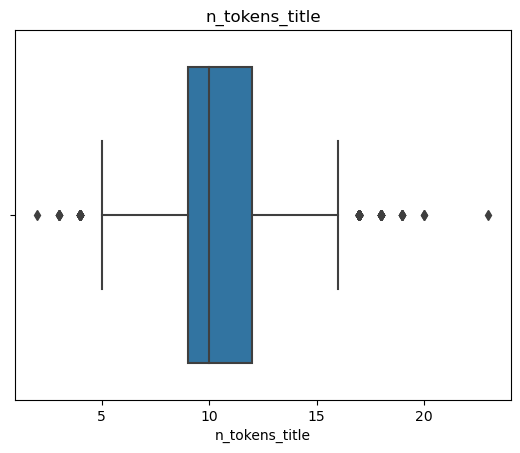

Q1: 9.0
Q3: 12.0
IQR: 3.0
Lower Whisker: 4.5
Upper Whisker: 16.5
Number of outliers lower than boxplot minimum: 34
Number of outliers greater than boxplot maximum: 122
Total number of Outliers: 156
Highest Outlier: 23.0
Lowest Outlier: 2.0


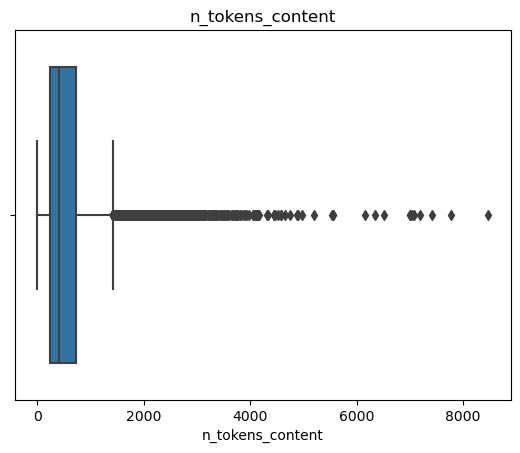

Q1: 246.0
Q3: 716.0
IQR: 470.0
Lower Whisker: -459.0
Upper Whisker: 1421.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 1933
Total number of Outliers: 1933
Highest Outlier: 8474.0
Lowest Outlier: 0.0


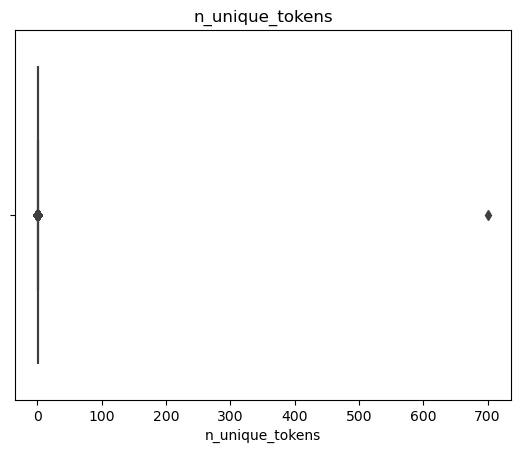

Q1: 0.47087041798525
Q3: 0.608695648393
IQR: 0.13782523040775008
Lower Whisker: 0.26413257237362486
Upper Whisker: 0.8154334940046252
Number of outliers lower than boxplot minimum: 1308
Number of outliers greater than boxplot maximum: 296
Total number of Outliers: 1604
Highest Outlier: 701.0
Lowest Outlier: 0.0


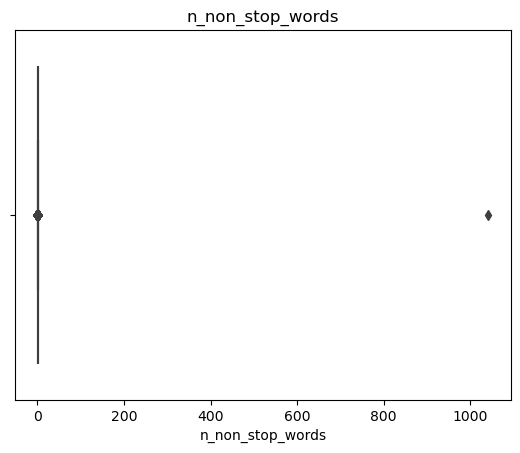

Q1: 0.999999993333
Q3: 0.999999997647
IQR: 4.313999935057211e-09
Lower Whisker: 0.9999999868620002
Upper Whisker: 1.000000004118
Number of outliers lower than boxplot minimum: 2826
Number of outliers greater than boxplot maximum: 1
Total number of Outliers: 2827
Highest Outlier: 1042.0
Lowest Outlier: 0.0


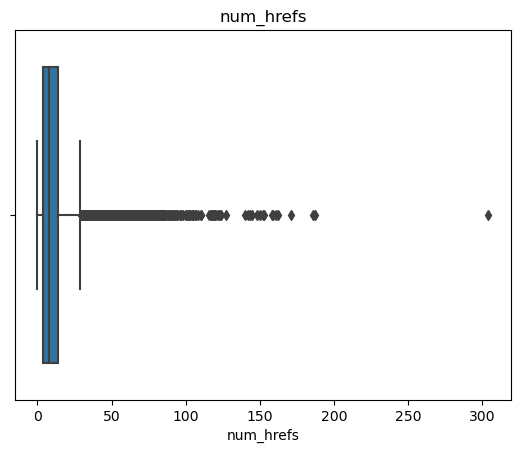

Q1: 4.0
Q3: 14.0
IQR: 10.0
Lower Whisker: -11.0
Upper Whisker: 29.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 2169
Total number of Outliers: 2169
Highest Outlier: 304.0
Lowest Outlier: 0.0


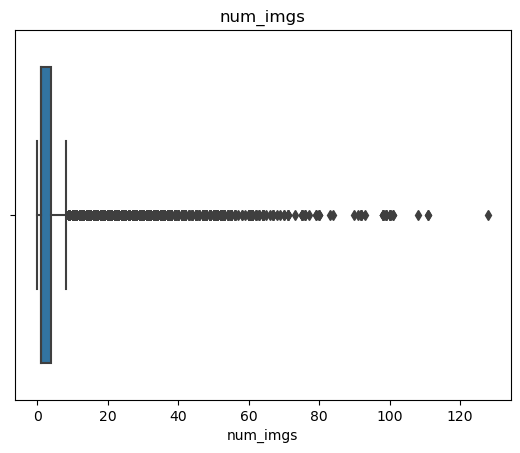

Q1: 1.0
Q3: 4.0
IQR: 3.0
Lower Whisker: -3.5
Upper Whisker: 8.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7703
Total number of Outliers: 7703
Highest Outlier: 128.0
Lowest Outlier: 0.0


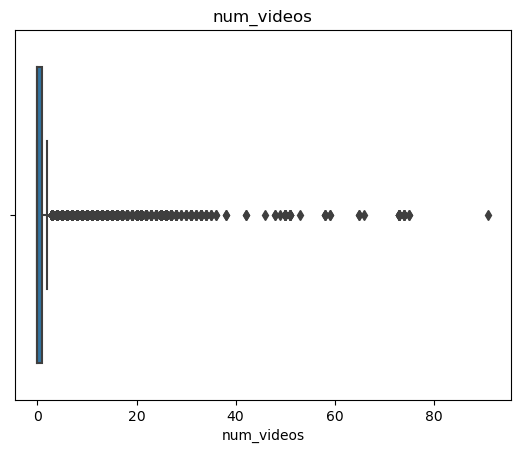

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 2946
Total number of Outliers: 2946
Highest Outlier: 91.0
Lowest Outlier: 0.0


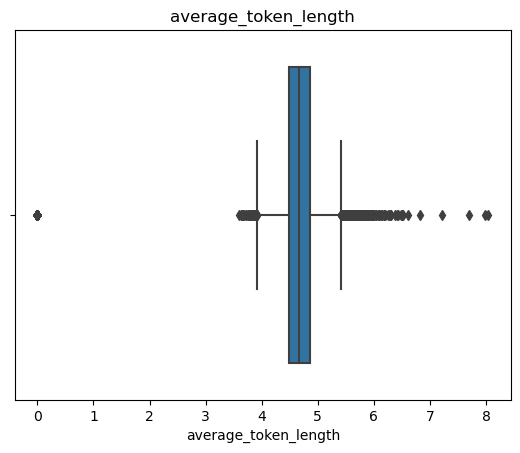

Q1: 4.4784039867075
Q3: 4.85483870968
IQR: 0.37643472297250025
Lower Whisker: 3.9137519022487495
Upper Whisker: 5.419490794138751
Number of outliers lower than boxplot minimum: 1236
Number of outliers greater than boxplot maximum: 445
Total number of Outliers: 1681
Highest Outlier: 8.04153354633
Lowest Outlier: 0.0


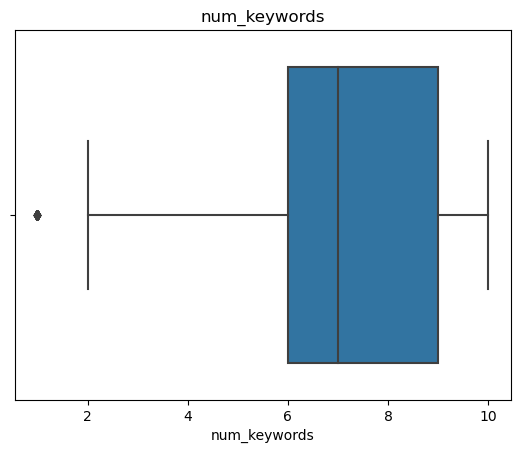

Q1: 6.0
Q3: 9.0
IQR: 3.0
Lower Whisker: 1.5
Upper Whisker: 13.5
Number of outliers lower than boxplot minimum: 51
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 51
Highest Outlier: 10.0
Lowest Outlier: 1.0


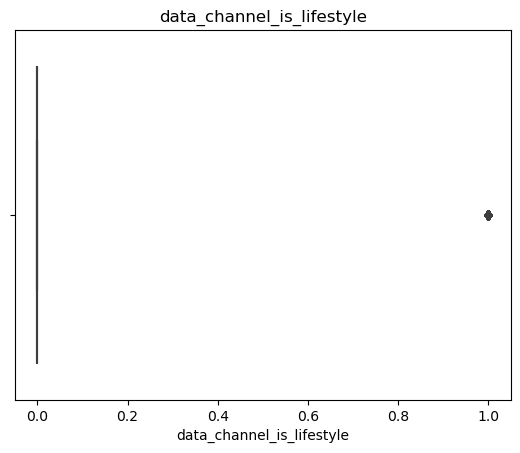

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 2099
Total number of Outliers: 2099
Highest Outlier: 1.0
Lowest Outlier: 0.0


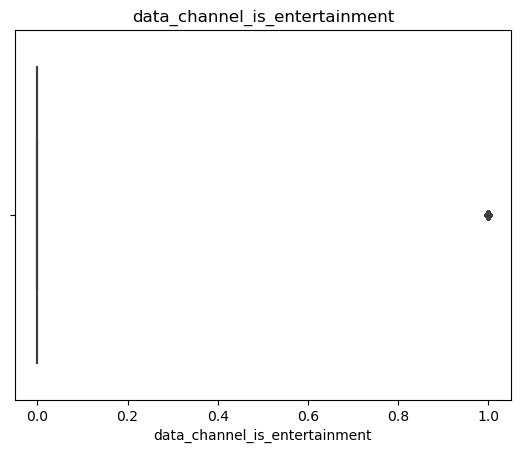

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7057
Total number of Outliers: 7057
Highest Outlier: 1.0
Lowest Outlier: 0.0


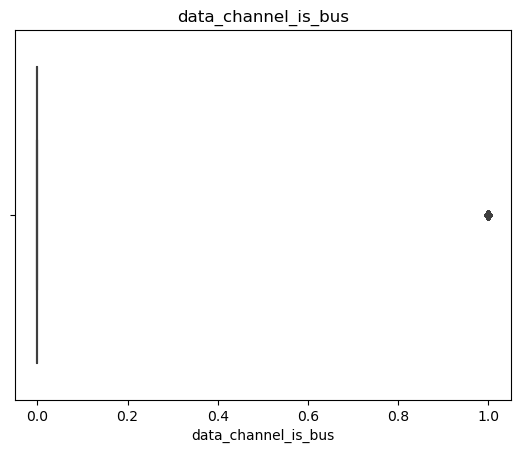

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 6258
Total number of Outliers: 6258
Highest Outlier: 1.0
Lowest Outlier: 0.0


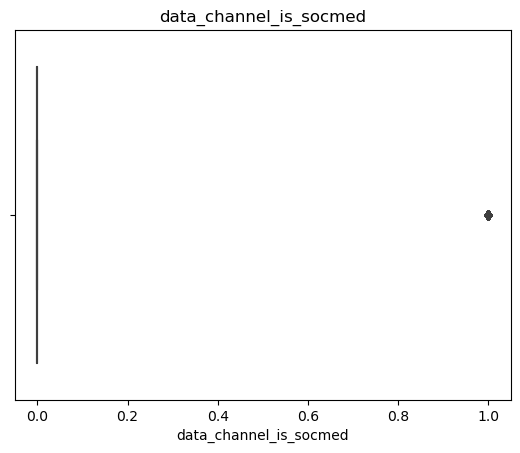

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 2323
Total number of Outliers: 2323
Highest Outlier: 1.0
Lowest Outlier: 0.0


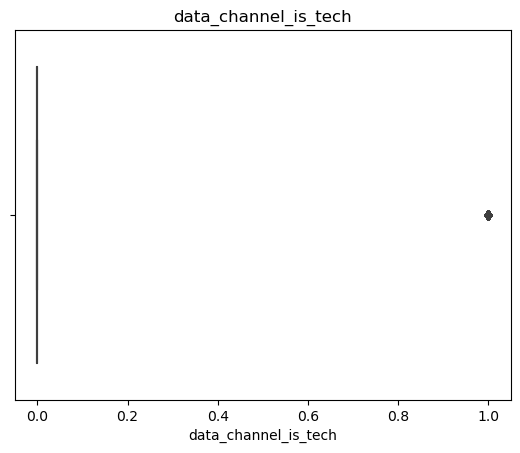

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7346
Total number of Outliers: 7346
Highest Outlier: 1.0
Lowest Outlier: 0.0


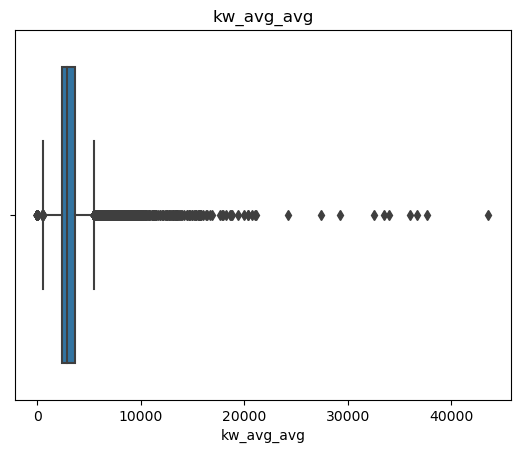

Q1: 2382.448565515
Q3: 3600.2295642050003
IQR: 1217.7809986900002
Lower Whisker: 555.7770674799999
Upper Whisker: 5426.90106224
Number of outliers lower than boxplot minimum: 85
Number of outliers greater than boxplot maximum: 1544
Total number of Outliers: 1629
Highest Outlier: 43567.6599458
Lowest Outlier: 0.0


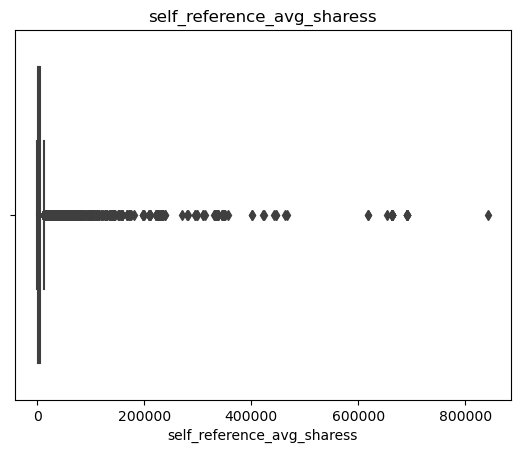

Q1: 981.1875
Q3: 5200.0
IQR: 4218.8125
Lower Whisker: -5347.03125
Upper Whisker: 11528.21875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 4209
Total number of Outliers: 4209
Highest Outlier: 843300.0
Lowest Outlier: 0.0


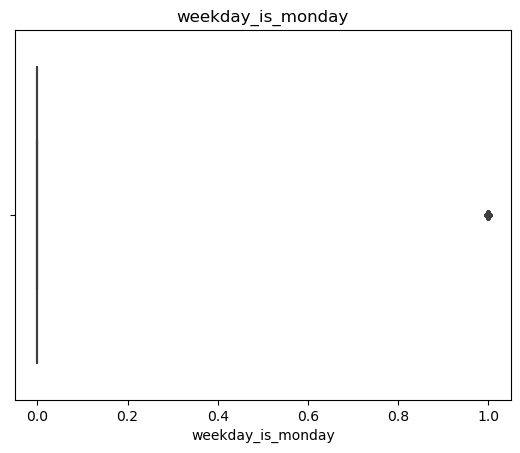

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 6661
Total number of Outliers: 6661
Highest Outlier: 1.0
Lowest Outlier: 0.0


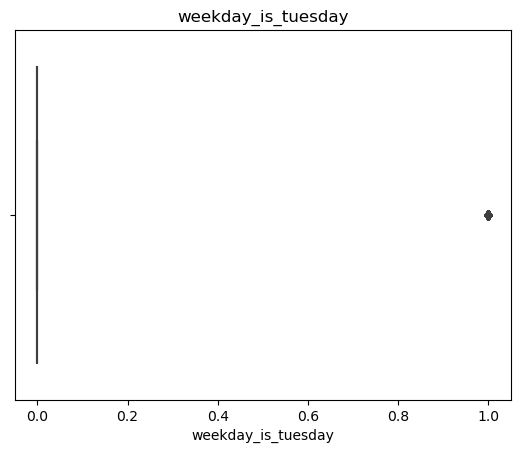

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7390
Total number of Outliers: 7390
Highest Outlier: 1.0
Lowest Outlier: 0.0


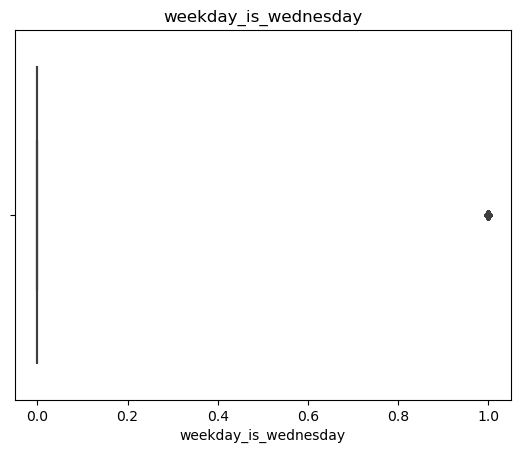

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7435
Total number of Outliers: 7435
Highest Outlier: 1.0
Lowest Outlier: 0.0


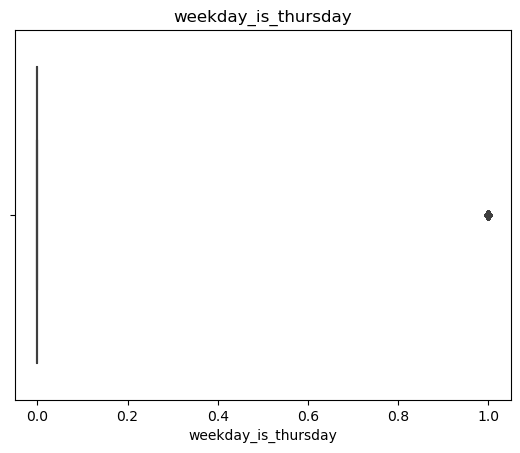

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 7267
Total number of Outliers: 7267
Highest Outlier: 1.0
Lowest Outlier: 0.0


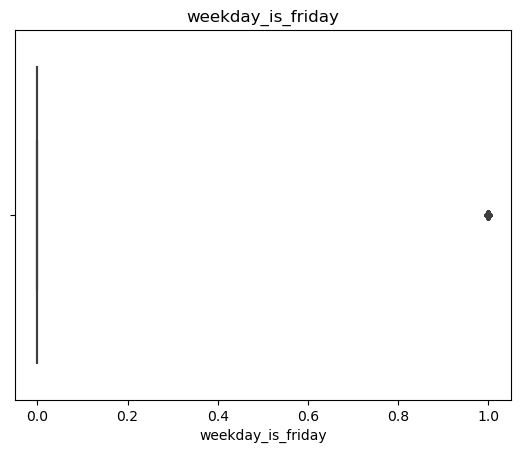

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 5701
Total number of Outliers: 5701
Highest Outlier: 1.0
Lowest Outlier: 0.0


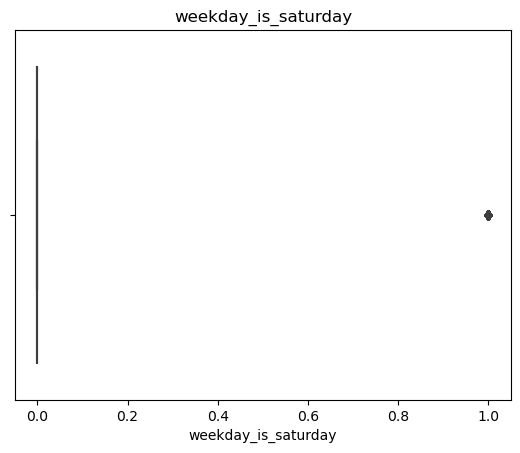

Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower Whisker: 0.0
Upper Whisker: 0.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 2453
Total number of Outliers: 2453
Highest Outlier: 1.0
Lowest Outlier: 0.0


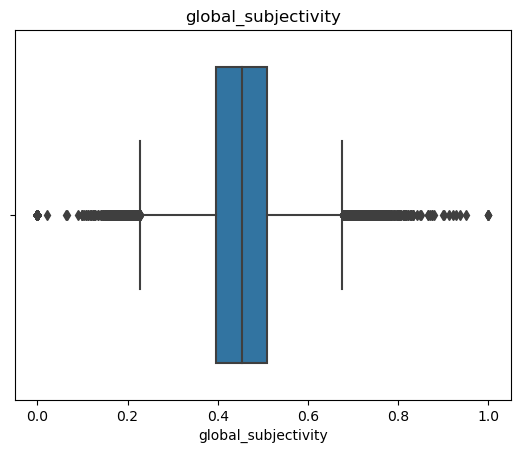

Q1: 0.39616667374
Q3: 0.508333333333
IQR: 0.11216665959300004
Lower Whisker: 0.22791668435049992
Upper Whisker: 0.6765833227225001
Number of outliers lower than boxplot minimum: 1438
Number of outliers greater than boxplot maximum: 474
Total number of Outliers: 1912
Highest Outlier: 1.0
Lowest Outlier: 0.0


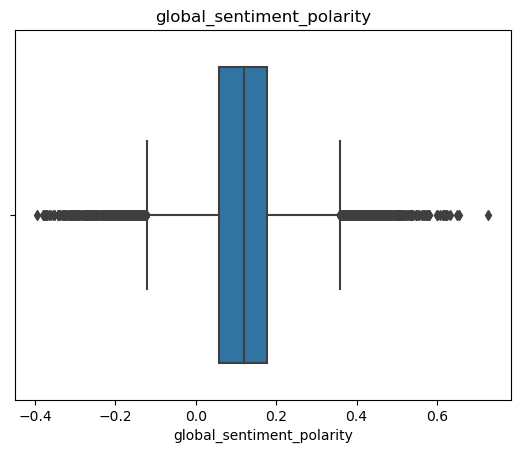

Q1: 0.057757354509225
Q3: 0.17783221243075
IQR: 0.120074857921525
Lower Whisker: -0.1223549323730625
Upper Whisker: 0.3579444993130375
Number of outliers lower than boxplot minimum: 343
Number of outliers greater than boxplot maximum: 482
Total number of Outliers: 825
Highest Outlier: 0.727840909091
Lowest Outlier: -0.39375


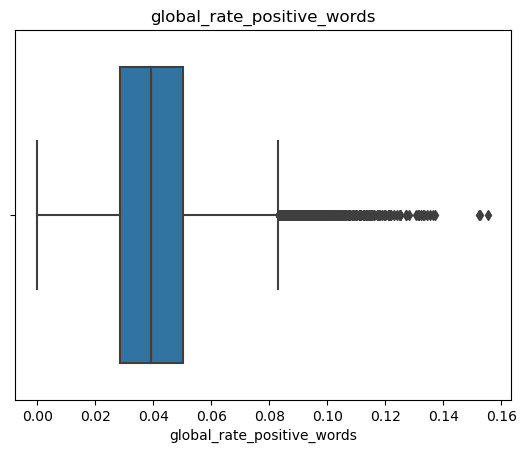

Q1: 0.028384279476
Q3: 0.0502793296089
IQR: 0.021895050132899996
Lower Whisker: -0.004458295723349992
Upper Whisker: 0.08312190480824999
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 497
Total number of Outliers: 497
Highest Outlier: 0.155487804878
Lowest Outlier: 0.0


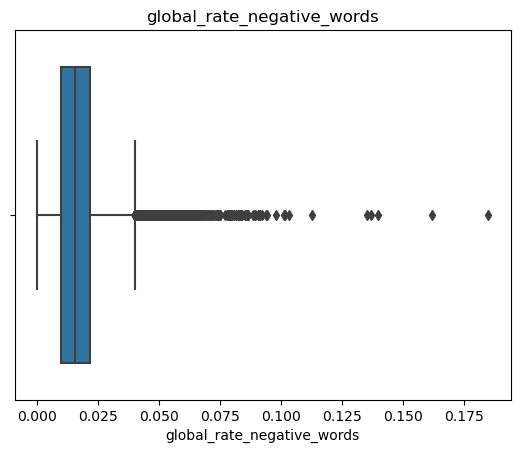

Q1: 0.00961538461538
Q3: 0.0217391304348
IQR: 0.01212374581942
Lower Whisker: -0.00857023411375
Upper Whisker: 0.039924749163930004
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 1324
Total number of Outliers: 1324
Highest Outlier: 0.184931506849
Lowest Outlier: 0.0


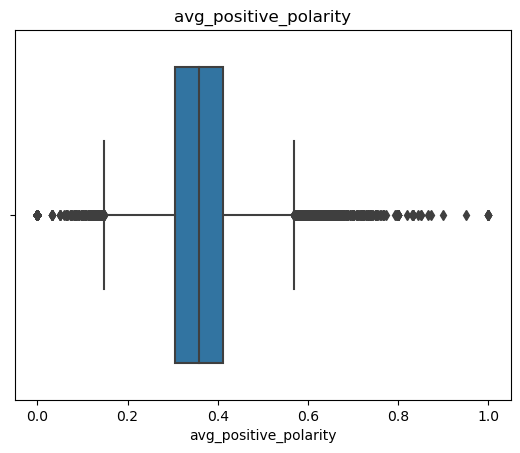

Q1: 0.30624354539775
Q3: 0.41142783353025003
IQR: 0.10518428813250003
Lower Whisker: 0.14846711319899997
Upper Whisker: 0.5692042657290001
Number of outliers lower than boxplot minimum: 1463
Number of outliers greater than boxplot maximum: 632
Total number of Outliers: 2095
Highest Outlier: 1.0
Lowest Outlier: 0.0


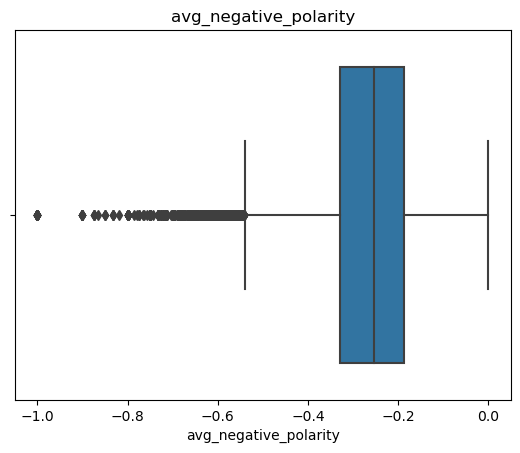

Q1: -0.32838258605075
Q3: -0.186904761905
IQR: 0.14147782414575
Lower Whisker: -0.540599322269375
Upper Whisker: 0.025311974313625002
Number of outliers lower than boxplot minimum: 865
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 865
Highest Outlier: 0.0
Lowest Outlier: -1.0


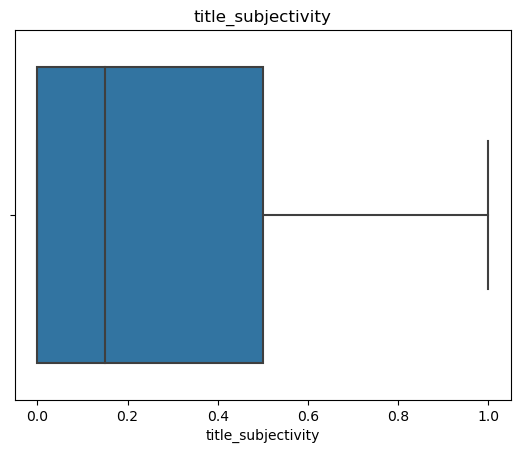

Q1: 0.0
Q3: 0.5
IQR: 0.5
Lower Whisker: -0.75
Upper Whisker: 1.25
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 1.0
Lowest Outlier: 0.0


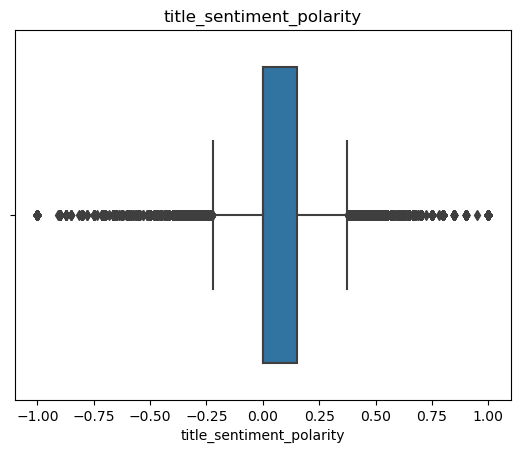

Q1: 0.0
Q3: 0.15
IQR: 0.15
Lower Whisker: -0.22499999999999998
Upper Whisker: 0.375
Number of outliers lower than boxplot minimum: 2706
Number of outliers greater than boxplot maximum: 4886
Total number of Outliers: 7592
Highest Outlier: 1.0
Lowest Outlier: -1.0


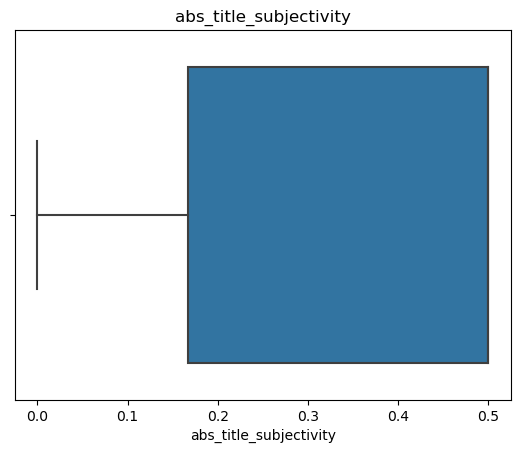

Q1: 0.166666666667
Q3: 0.5
IQR: 0.33333333333299997
Lower Whisker: -0.3333333333324999
Upper Whisker: 0.9999999999995
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Highest Outlier: 0.5
Lowest Outlier: 0.0


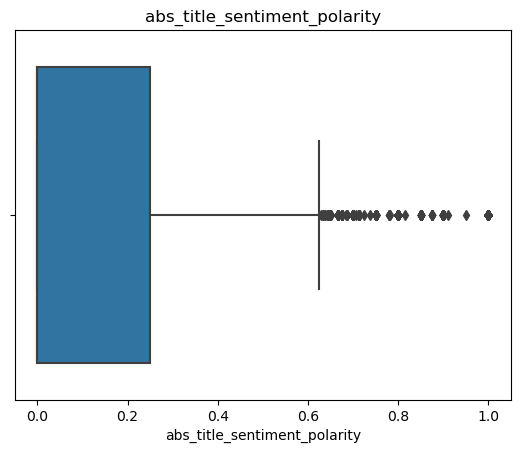

Q1: 0.0
Q3: 0.25
IQR: 0.25
Lower Whisker: -0.375
Upper Whisker: 0.625
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 1655
Total number of Outliers: 1655
Highest Outlier: 1.0
Lowest Outlier: 0.0


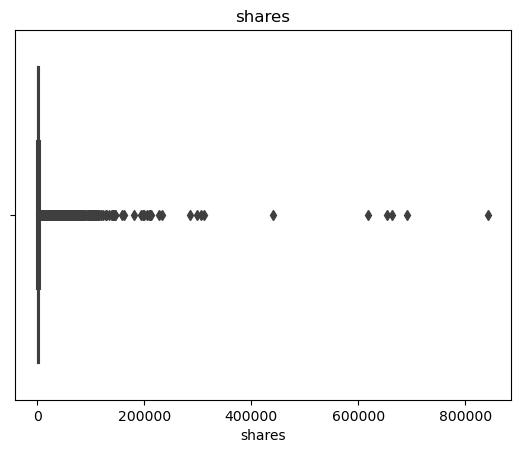

Q1: 946.0
Q3: 2800.0
IQR: 1854.0
Lower Whisker: -1835.0
Upper Whisker: 5581.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 4541
Total number of Outliers: 4541
Highest Outlier: 843300
Lowest Outlier: 1


In [51]:
column_names = df_news.columns
for column_name in column_names: 
    boxplot_info(column_name)

### Univariate Visualizations

The next step I took was to generate univariate visualizations of each feature in the dataset.  I did this to gain an understanding of how the data points in each feature are distributed.  

In [15]:
def generate_hist(column_name):
    plt.hist(df_news[column_name])
    plt.title(column_name)
    plt.show()

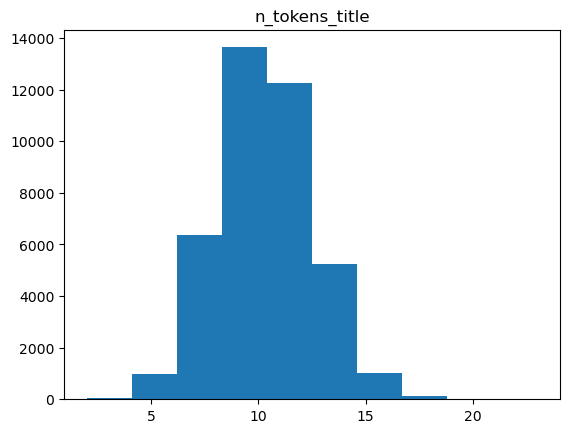

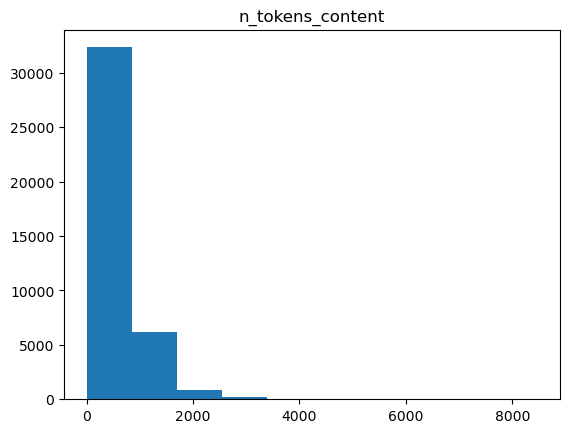

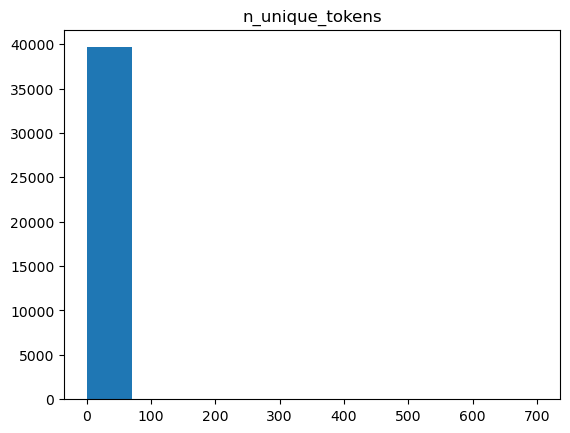

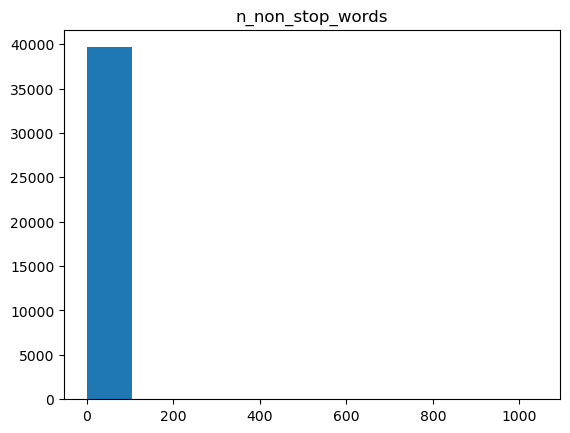

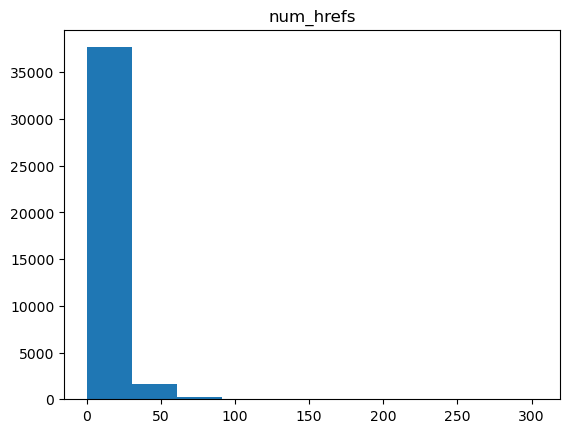

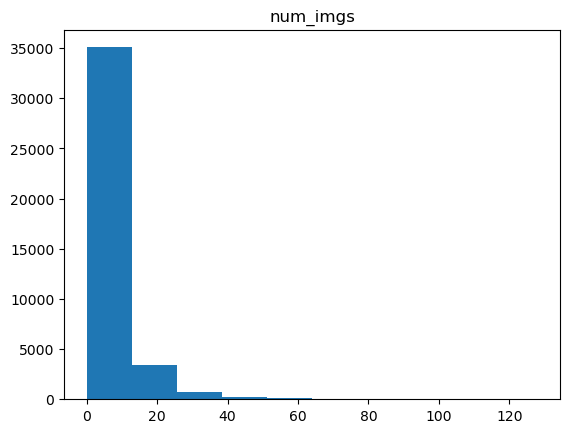

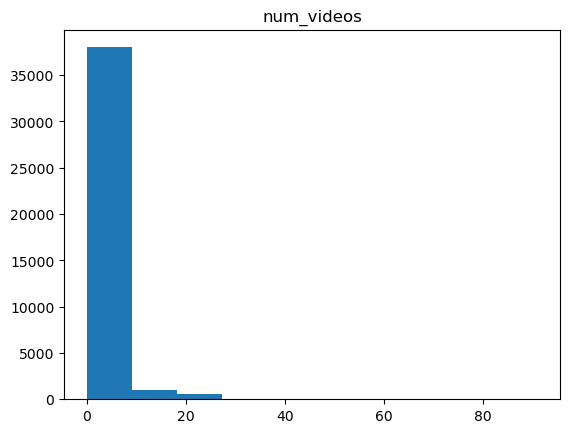

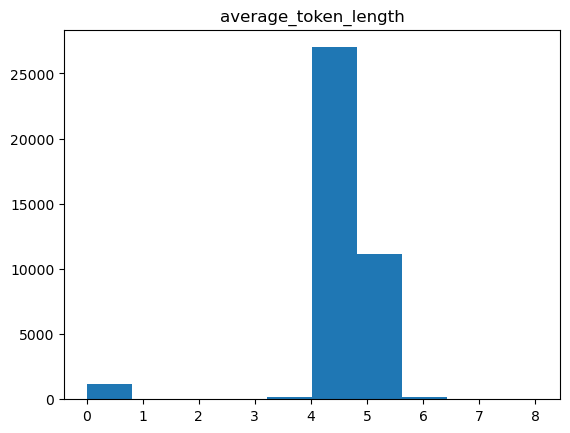

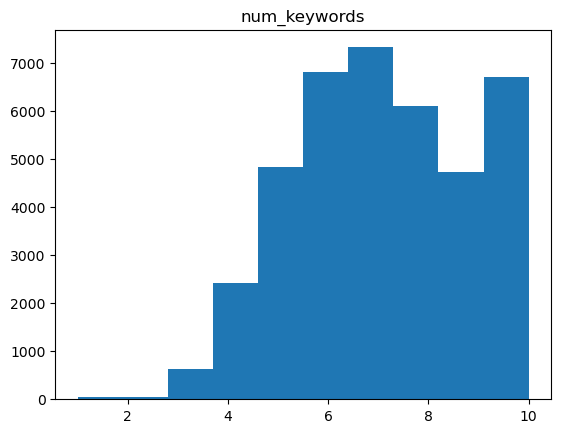

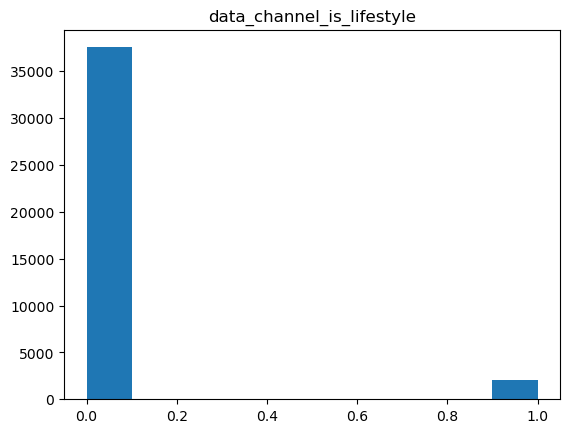

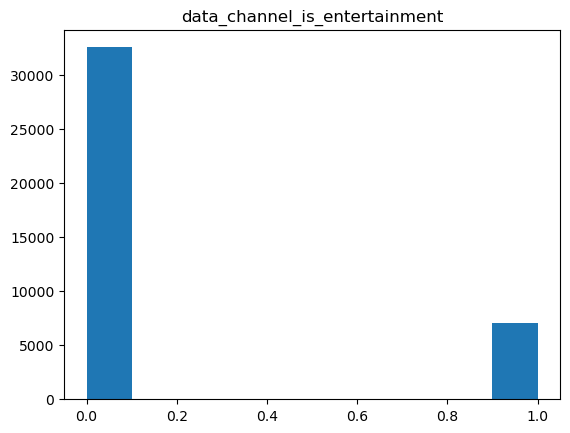

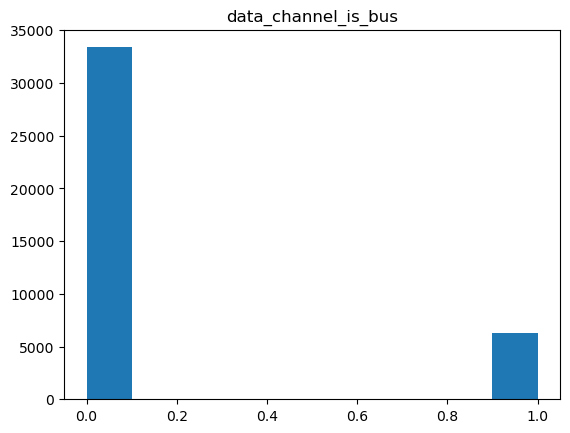

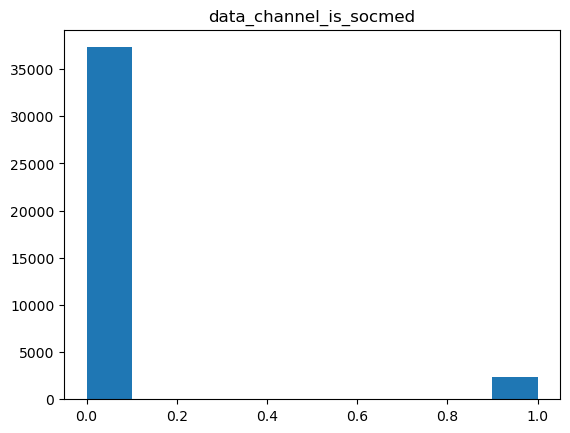

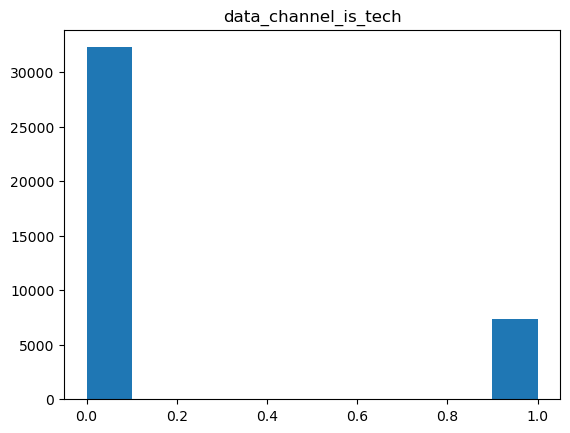

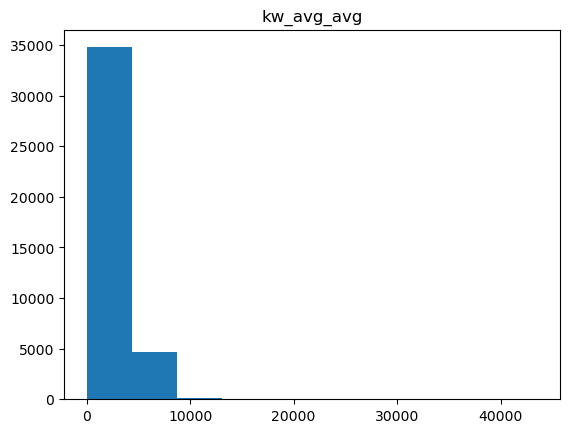

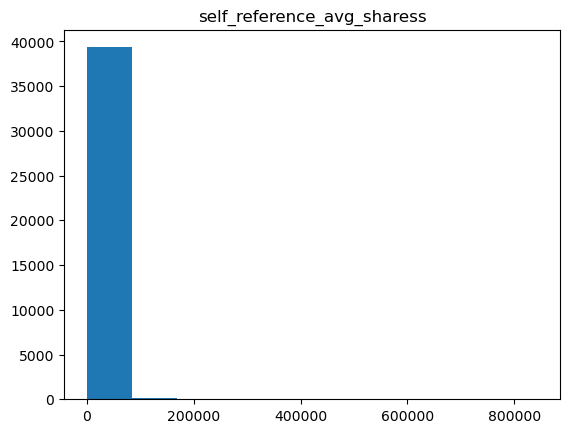

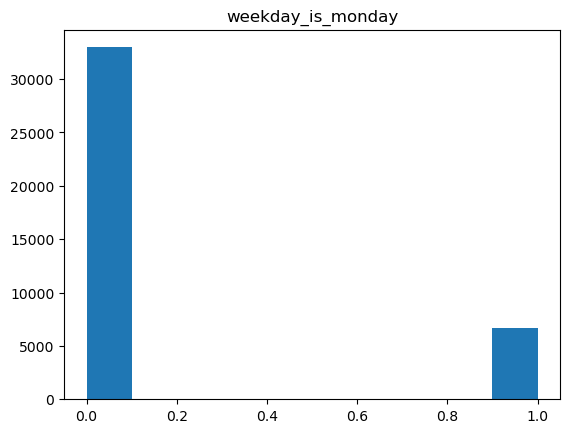

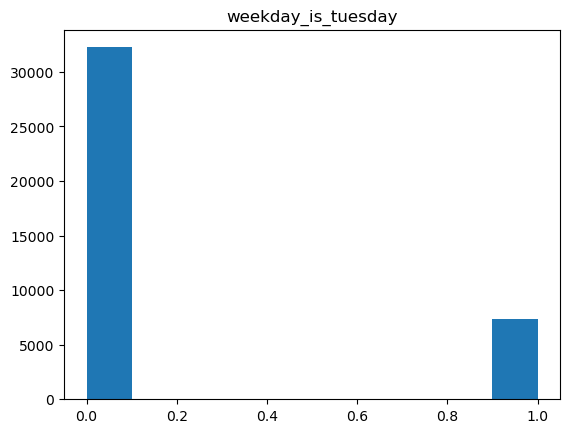

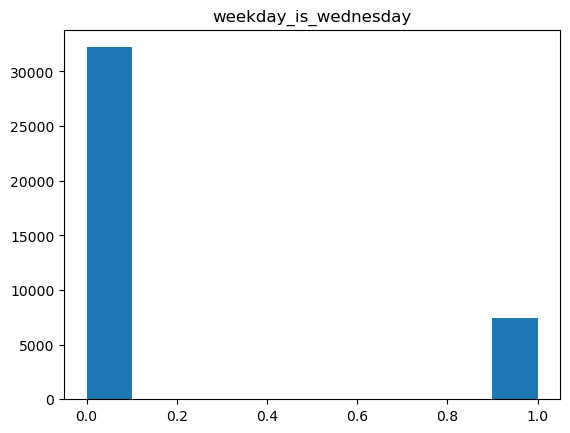

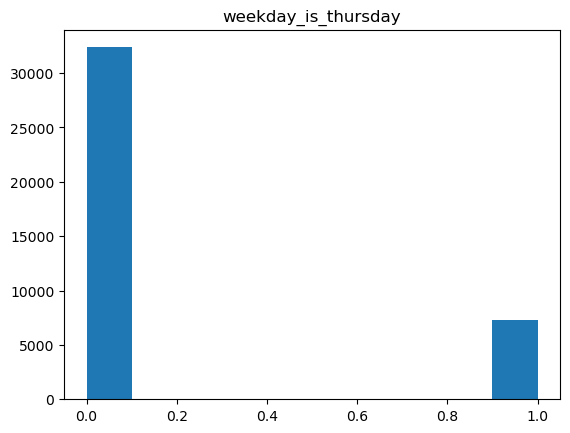

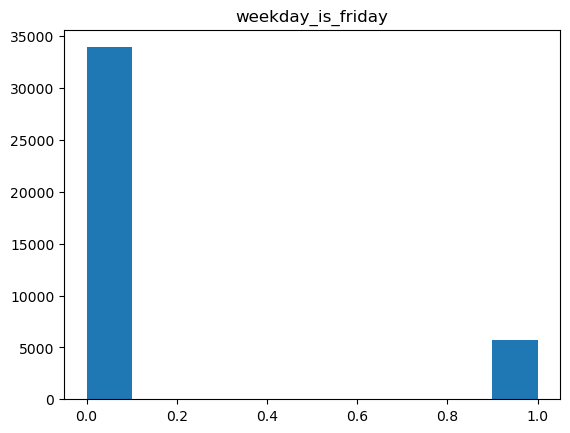

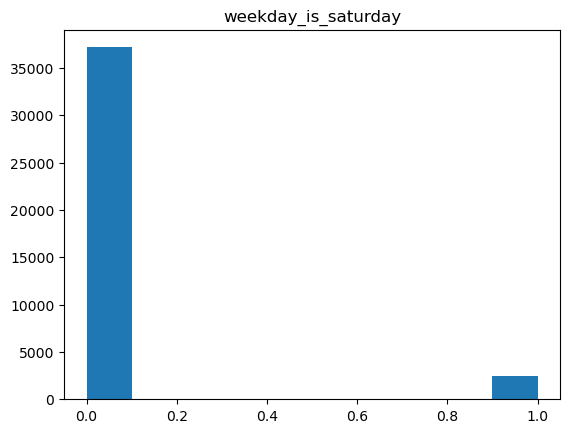

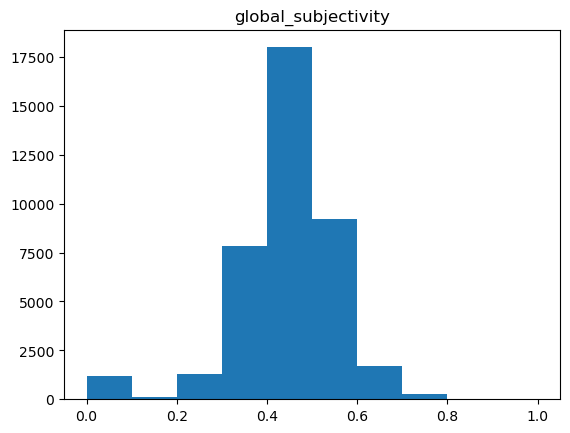

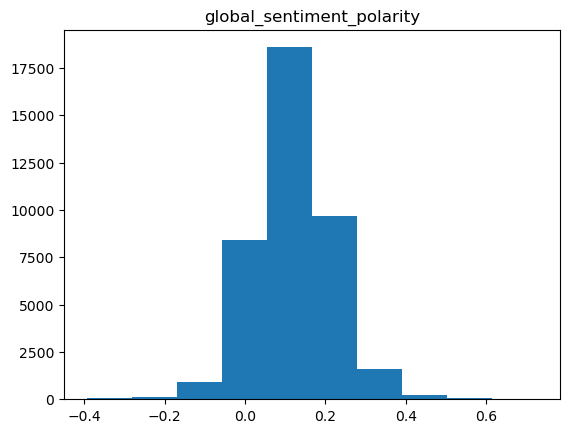

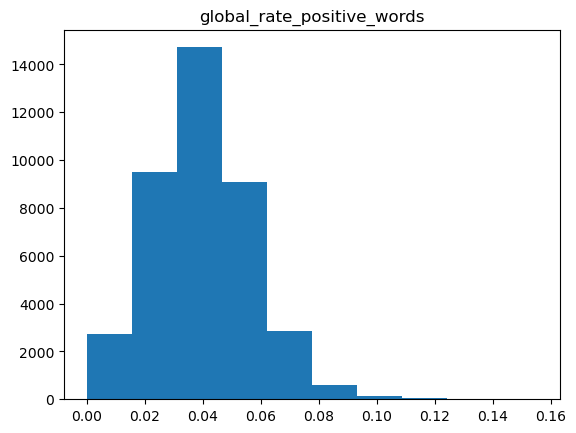

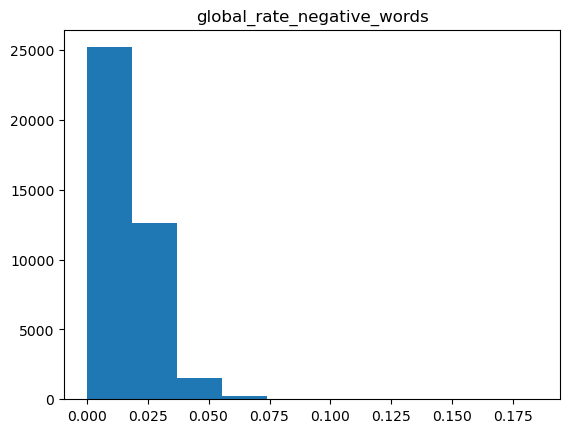

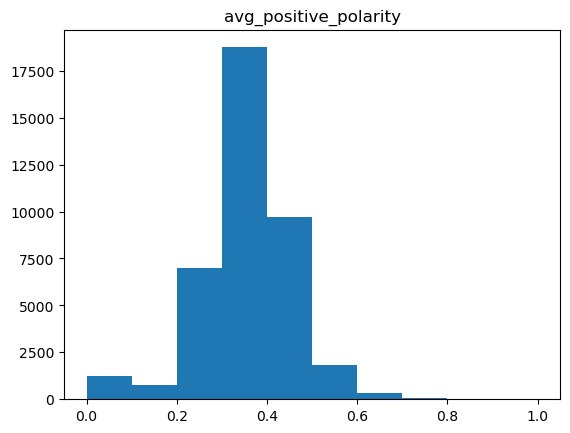

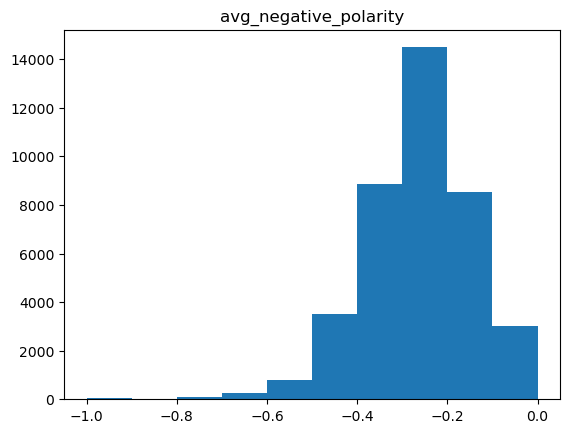

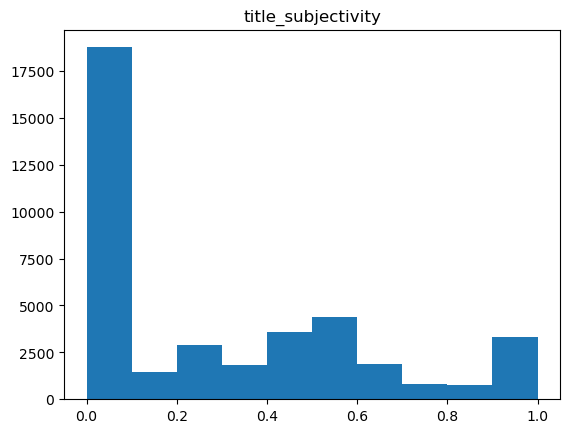

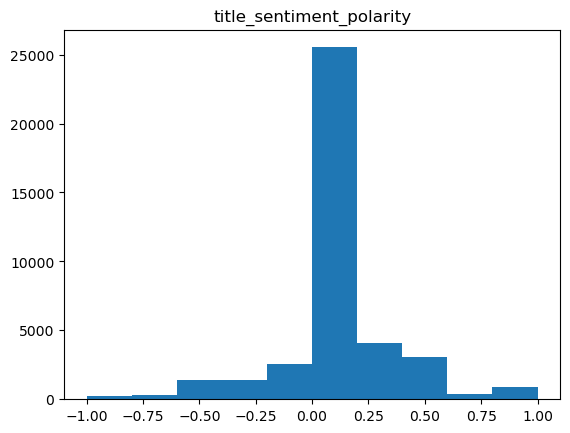

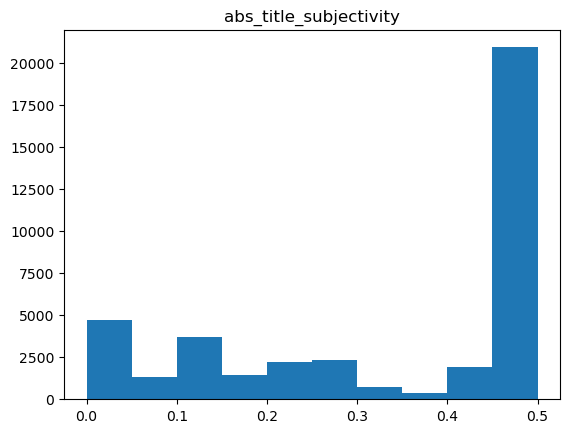

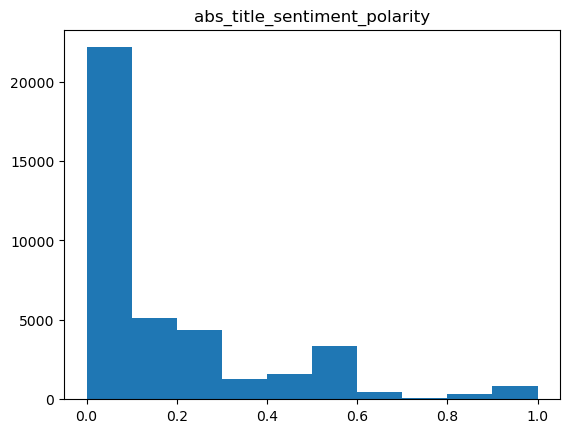

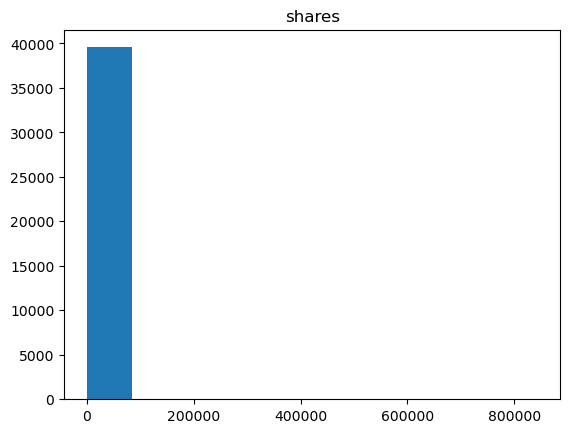

In [53]:
for column in column_names:
    generate_hist(column)

### Bivariate Visualizations

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To explore the relationship between individual features and the dependent variable, shares, I decided to generate several scatterplots.  This gave me an idea of what features have might have a effect on the dependent variable.  

In [17]:
independent_variables = column_names.drop('shares')

In [18]:
def bivariate(column_name):
    sns.scatterplot(x=column_name, y="shares", data=df_news)
    plt.show()

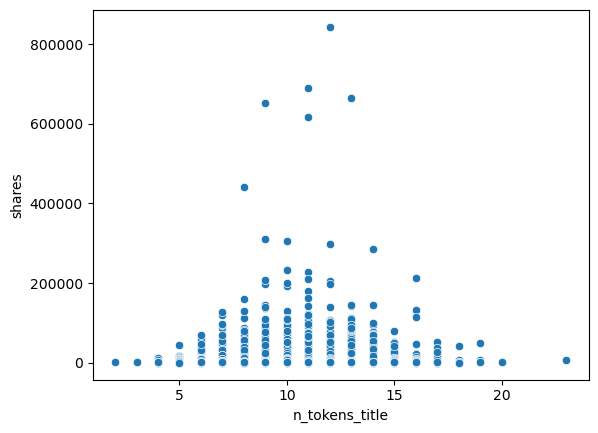

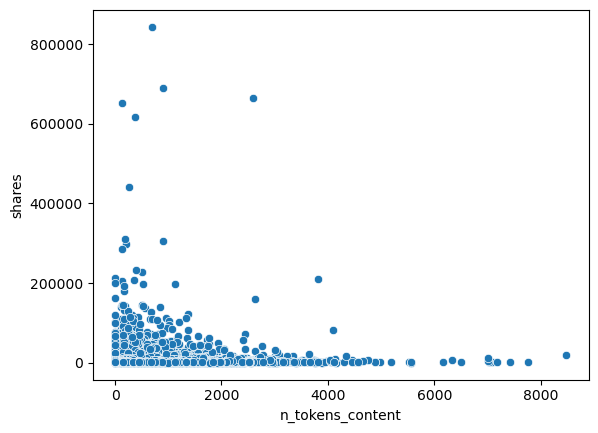

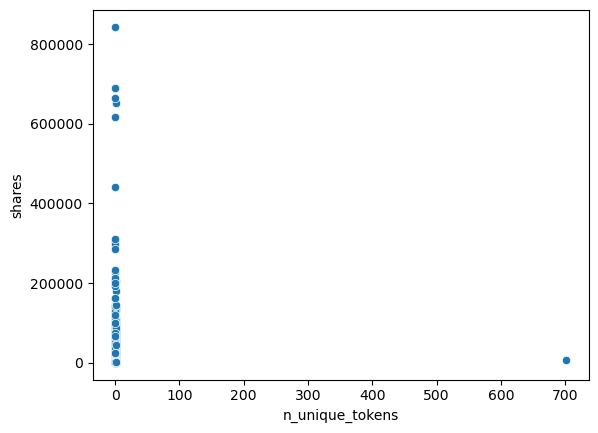

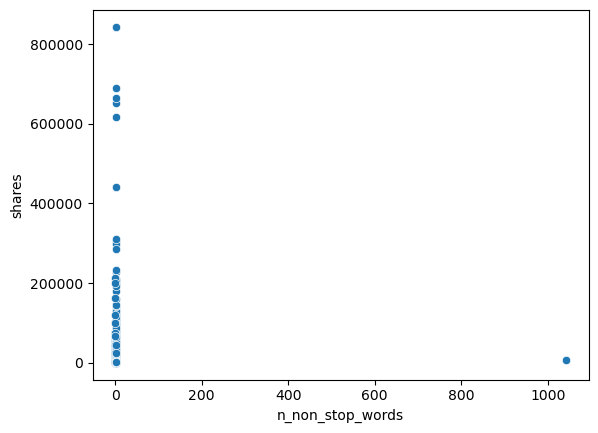

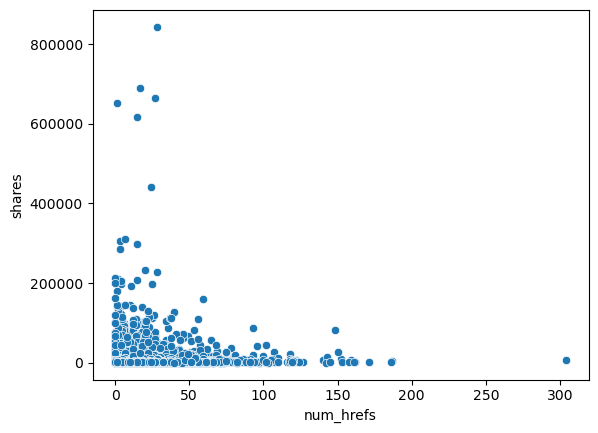

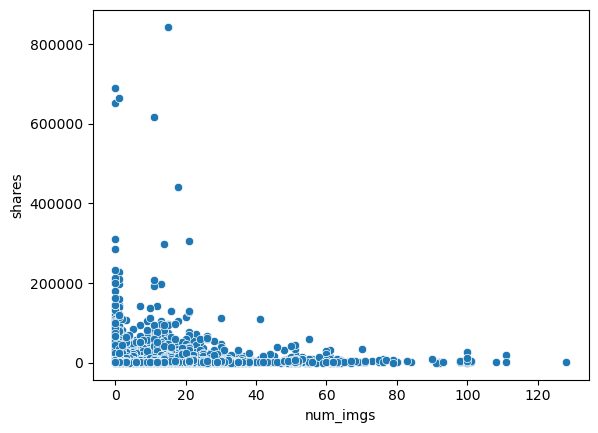

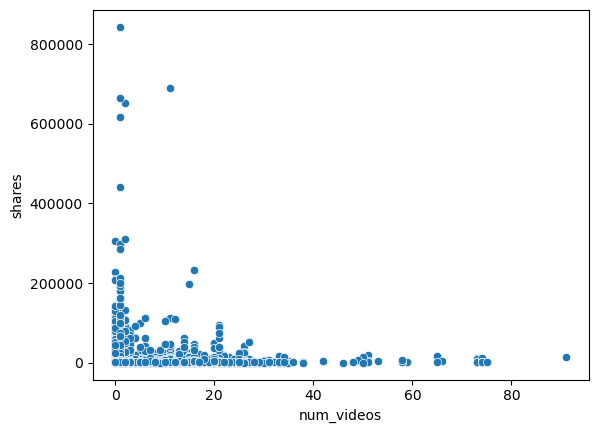

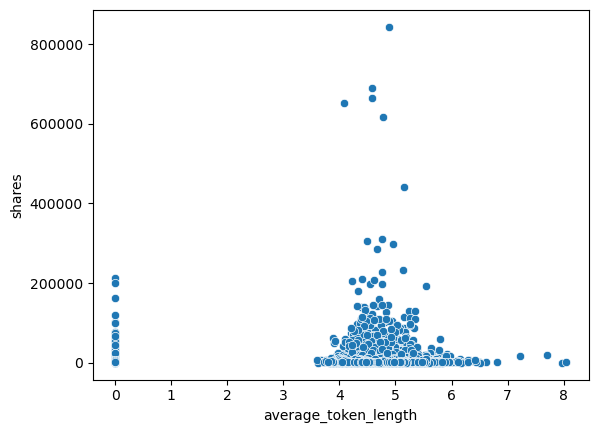

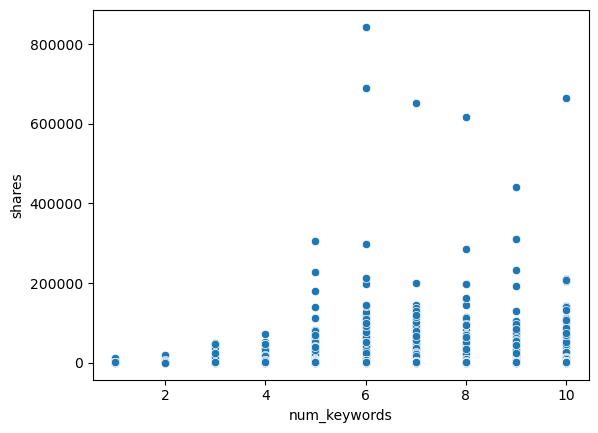

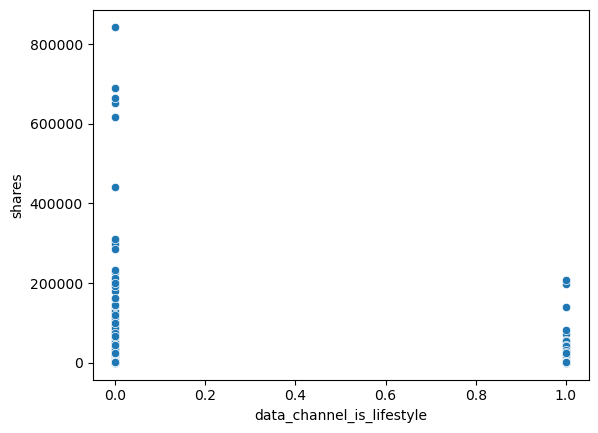

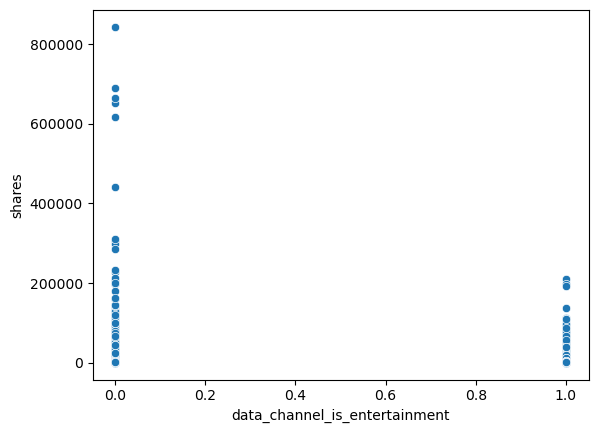

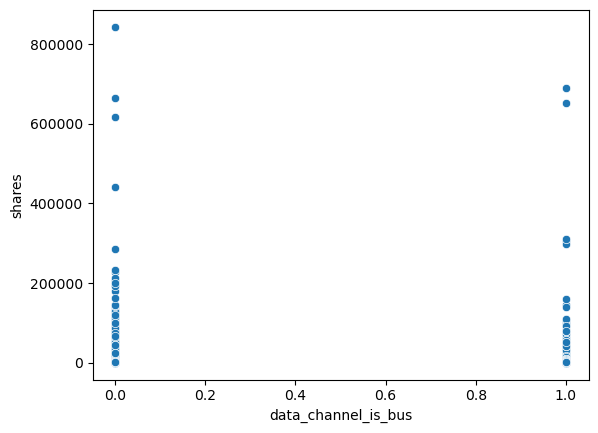

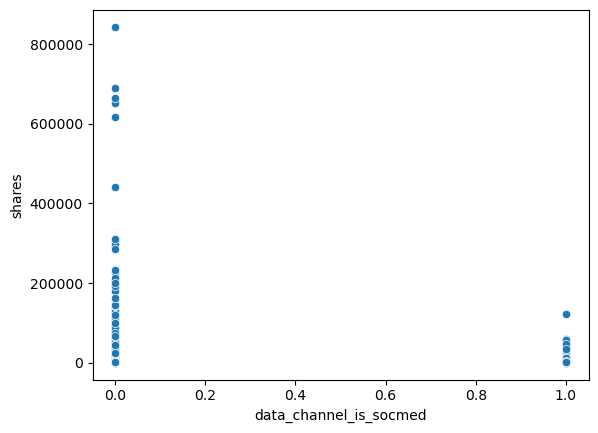

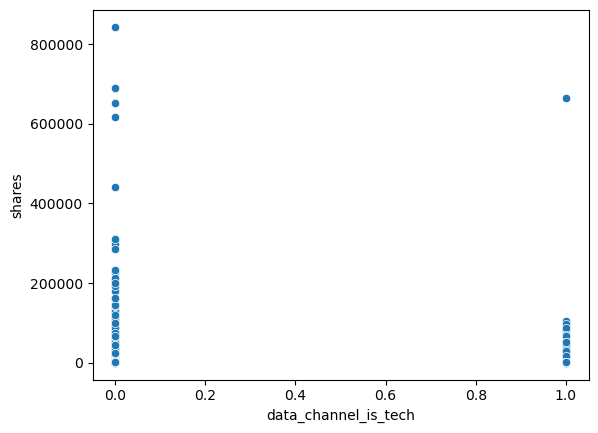

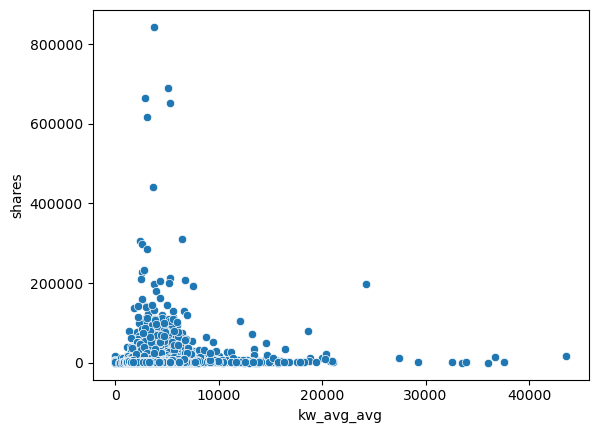

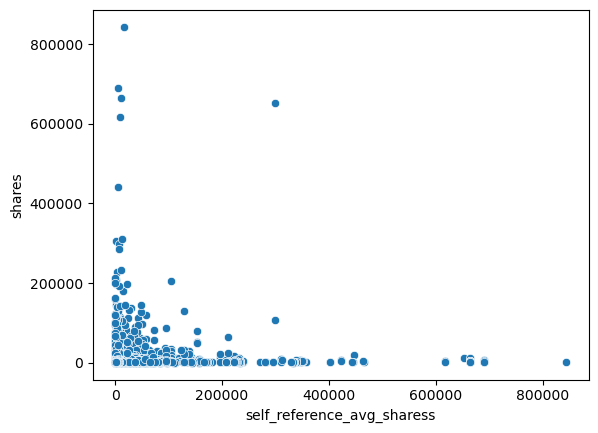

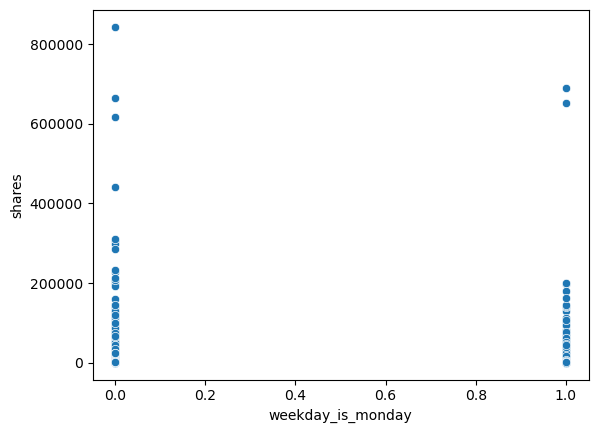

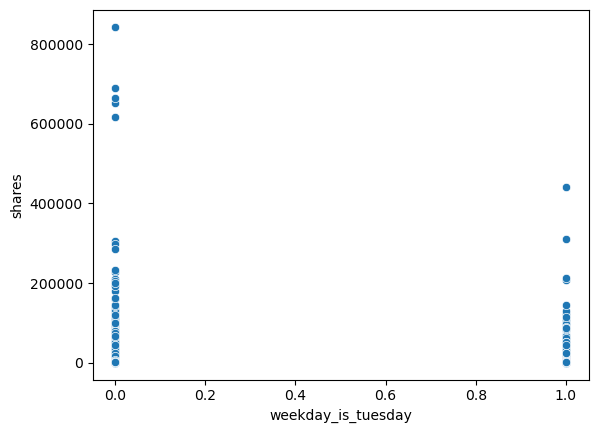

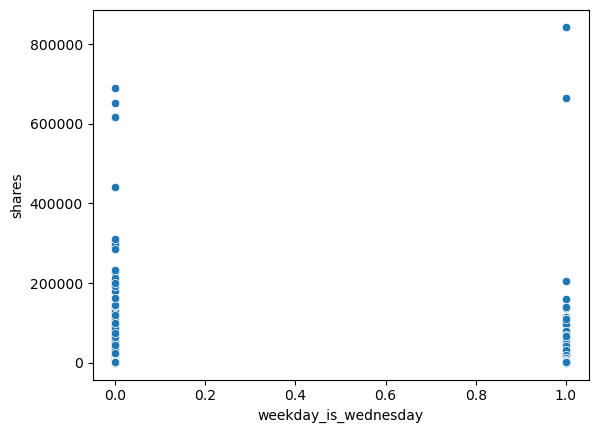

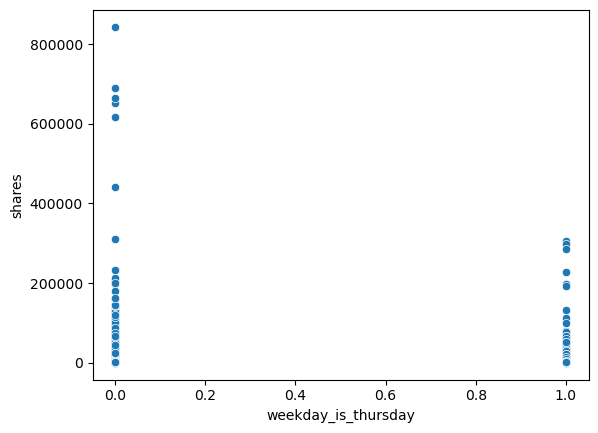

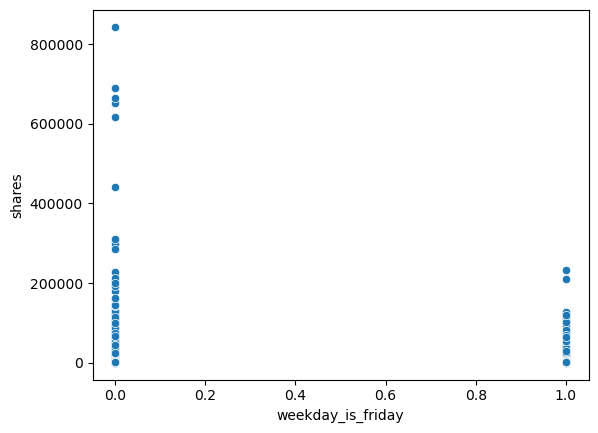

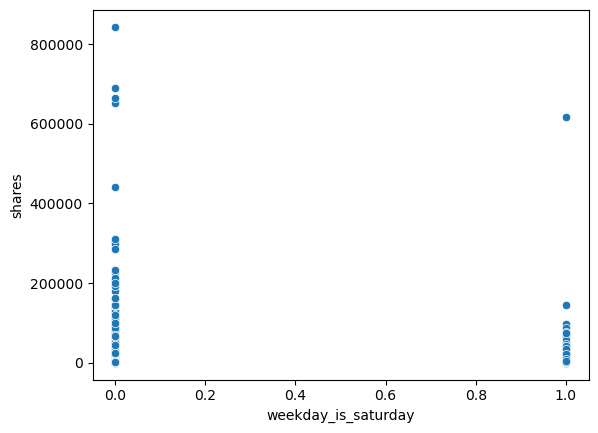

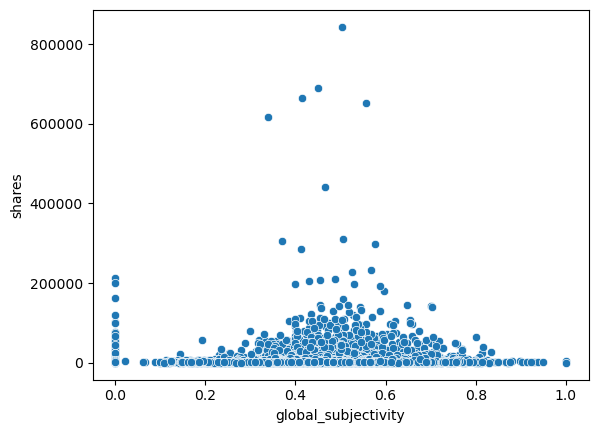

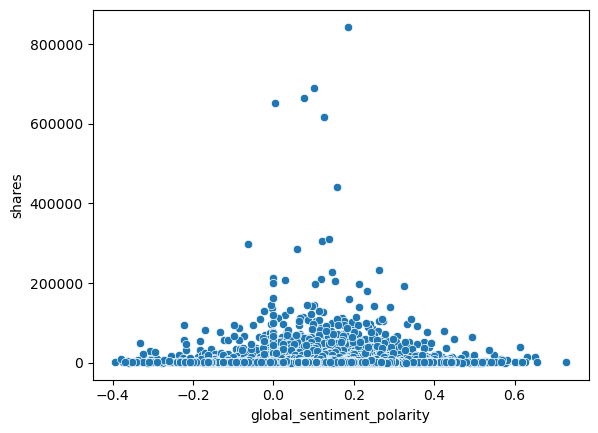

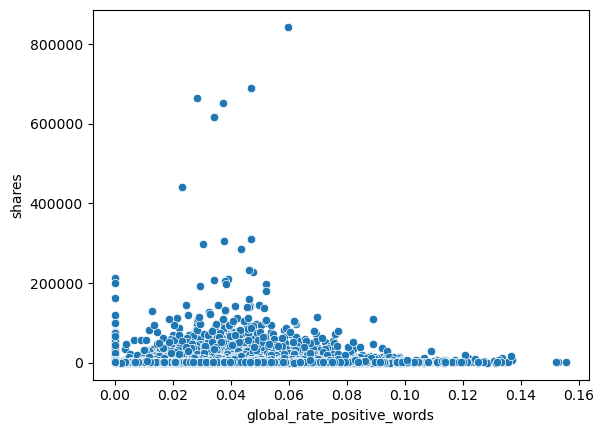

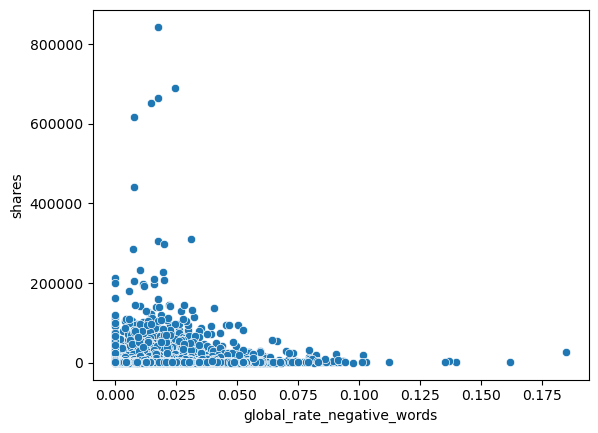

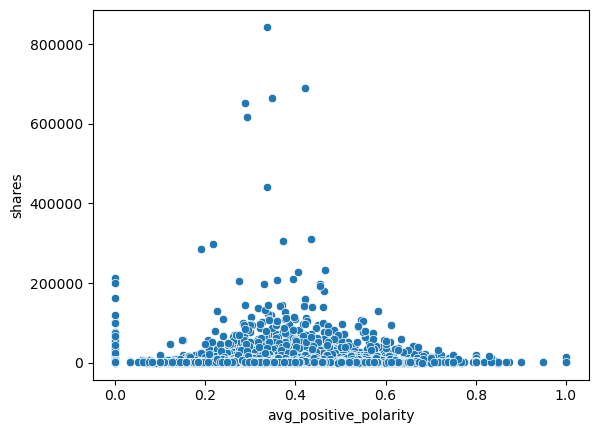

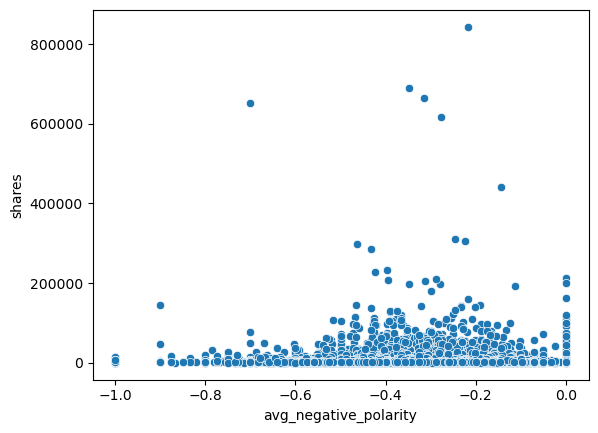

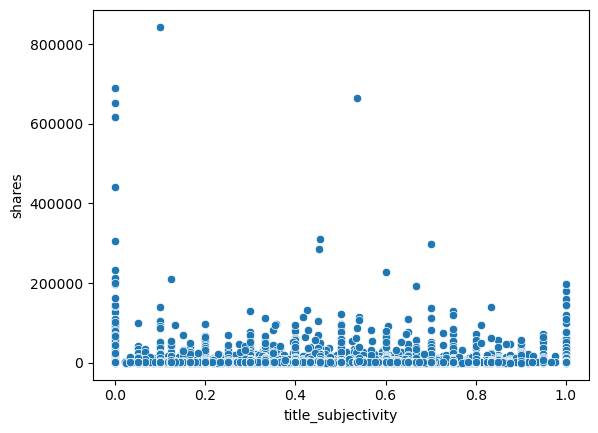

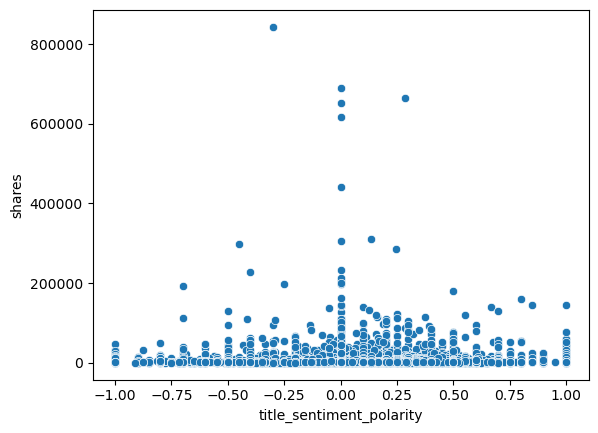

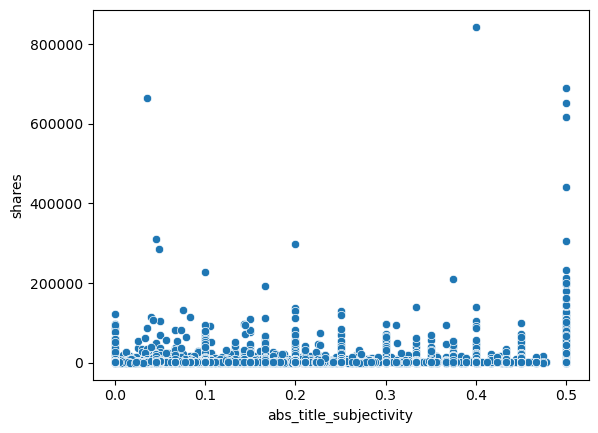

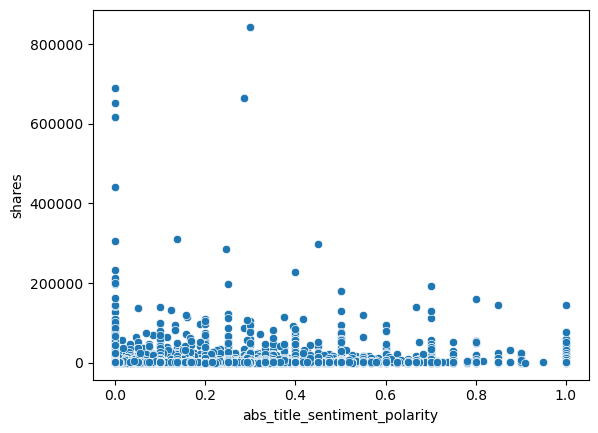

In [52]:
for variable in independent_variables:
    bivariate(variable)

## D.  Analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I began the analysis by creating an initial model containing of all of the independent variables in "df_news".  I then employed backwards stepwise elimination to reduce the number of independent variables needed to predict the dependent variable.   This method was chosen because it eliminates multicollinearity in the dataset and prevents the model from overfitting due to too many variables (Frost).  An advantage of this process is that it was simple and very useful in identifying all statistically significant variables.  A disadvantage is that the high number of variables will required many model iterations and was very time consuming.

#### Initial Model

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To create my initial multiple linear regression model, I first assigned the dependent and independent variables to separate dataframes, called "y" and "X", respectively.  I also added a constant to my model using the "add_constant()" method from the statsmodels library.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To perform the linear regression, I used the "OLS()" method from statsmodels, using "X" and "y" as parameters.  I also fit the model to the data using the "fit()" method.  This model was named "mdl_initial". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To see the results of the regression model, I used the "summary()" method on "mdl_initial" and printed the results.  Please see the output of the initial regression model below.

In [20]:
#Build initial linear regression model [In-text citation: (LaRose et al, 2019)]

#Assign independent variables to dataframe X
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','num_hrefs','num_imgs',
              'num_videos','average_token_length','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_positive_polarity','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_initial = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_initial.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     23.27
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.49e-134
Time:                        13:03:51   Log-Likelihood:            -4.2699e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39611   BIC:                         8.543e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Checking for Multicollinearity

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A critical pitfall to avoid in regression analysis is multicollinearity.  Multicollinearity occurs when there is a very strong relationship between two or more independent variables in the model (Hayes, 2024).  This can cause the model to produce unreliable results.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One method of detecting multicollinearity is to calculate the variance inflation factor (VIF) of each feature.  A feature with a VIF greater than 10 demonstrate significant multicollinearity and should be removed from the model (CFI).  To detect multicollinearity, I began by creating a dataframe called "vif_data" which contains the name of each feature.  I then iterated over each feature and obtained the VIF using the "variance_inflation_factor()" function from statsmodels. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the first example below, it appears that "n_non_stop_words" had the highest VIF with a value of 3078.152511.  I removed the feature and repeated the same process to calculate new VIF values for each feature.  This process was repeated several time until there were no features left with a VIF greater than 10.

In [21]:
# Calculate VIF for all independent variables in the initial model

#Assign independent variables to dataframe X
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','num_hrefs','num_imgs',
              'num_videos','average_token_length','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_positive_polarity','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature          VIF
0                  n_tokens_title    19.426902
1                n_tokens_content     6.487936
2                 n_unique_tokens  3040.841603
3                n_non_stop_words  3078.152511
4                       num_hrefs     2.765173
5                        num_imgs     1.735975
6                      num_videos     1.248228
7            average_token_length    49.689006
8                    num_keywords    14.321545
9       data_channel_is_lifestyle     1.197149
10  data_channel_is_entertainment     1.581341
11            data_channel_is_bus     1.577598
12         data_channel_is_socmed     1.213193
13           data_channel_is_tech     1.686806
14                     kw_avg_avg     7.248454
15     self_reference_avg_sharess     1.108805
16              weekday_is_monday     3.095053
17             weekday_is_tuesday     3.342753
18           weekday_is_wednesday     3.349070
19            weekday_is_thursday     3.286552
20           

In [22]:
#Remove n_non_stop_words (VIF = 3078.152511)
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','average_token_length','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_positive_polarity','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                  n_tokens_title  19.398159
1                n_tokens_content   3.333863
2                 n_unique_tokens   1.026850
3                       num_hrefs   2.765093
4                        num_imgs   1.712061
5                      num_videos   1.239571
6            average_token_length  49.169321
7                    num_keywords  14.314069
8       data_channel_is_lifestyle   1.194201
9   data_channel_is_entertainment   1.580811
10            data_channel_is_bus   1.572719
11         data_channel_is_socmed   1.211325
12           data_channel_is_tech   1.672024
13                     kw_avg_avg   7.215915
14     self_reference_avg_sharess   1.108801
15              weekday_is_monday   3.094331
16             weekday_is_tuesday   3.342048
17           weekday_is_wednesday   3.348209
18            weekday_is_thursday   3.285844
19              weekday_is_friday   2.797090
20            weekday_is_saturday   1.774015
21        

In [23]:
#Remove average_token_length (VIF = 49.169321)
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_positive_polarity','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                  n_tokens_title  18.027475
1                n_tokens_content   3.330676
2                 n_unique_tokens   1.024720
3                       num_hrefs   2.717012
4                        num_imgs   1.709456
5                      num_videos   1.224163
6                    num_keywords  13.994921
7       data_channel_is_lifestyle   1.193128
8   data_channel_is_entertainment   1.577316
9             data_channel_is_bus   1.554519
10         data_channel_is_socmed   1.209750
11           data_channel_is_tech   1.672016
12                     kw_avg_avg   7.157020
13     self_reference_avg_sharess   1.108633
14              weekday_is_monday   3.008537
15             weekday_is_tuesday   3.244928
16           weekday_is_wednesday   3.251892
17            weekday_is_thursday   3.185102
18              weekday_is_friday   2.725650
19            weekday_is_saturday   1.750227
20            global_subjectivity  35.298364
21      gl

In [24]:
#Remove avg_positive_polarity (VIF = 37.671377)
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                  n_tokens_title  17.789469
1                n_tokens_content   3.320342
2                 n_unique_tokens   1.024699
3                       num_hrefs   2.716412
4                        num_imgs   1.709400
5                      num_videos   1.224147
6                    num_keywords  13.937258
7       data_channel_is_lifestyle   1.192838
8   data_channel_is_entertainment   1.576578
9             data_channel_is_bus   1.546742
10         data_channel_is_socmed   1.209589
11           data_channel_is_tech   1.671642
12                     kw_avg_avg   7.156771
13     self_reference_avg_sharess   1.108632
14              weekday_is_monday   2.997797
15             weekday_is_tuesday   3.236638
16           weekday_is_wednesday   3.240688
17            weekday_is_thursday   3.176859
18              weekday_is_friday   2.718627
19            weekday_is_saturday   1.747865
20            global_subjectivity  31.429975
21      gl

In [25]:
#Remove global_subjectivity (VIF = 31.429975)
X = pd.DataFrame(df_news[['n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                  n_tokens_title  17.477359
1                n_tokens_content   3.317864
2                 n_unique_tokens   1.024639
3                       num_hrefs   2.686840
4                        num_imgs   1.709325
5                      num_videos   1.221583
6                    num_keywords  13.842970
7       data_channel_is_lifestyle   1.192093
8   data_channel_is_entertainment   1.576492
9             data_channel_is_bus   1.545069
10         data_channel_is_socmed   1.208524
11           data_channel_is_tech   1.653695
12                     kw_avg_avg   7.131097
13     self_reference_avg_sharess   1.107201
14              weekday_is_monday   2.972416
15             weekday_is_tuesday   3.207710
16           weekday_is_wednesday   3.208948
17            weekday_is_thursday   3.147387
18              weekday_is_friday   2.692041
19            weekday_is_saturday   1.741077
20      global_sentiment_polarity   7.162725
21     glo

In [26]:
#Remove n_tokens_title (VIF = 17.477359)
X = pd.DataFrame(df_news[['n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity','global_rate_positive_words',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                n_tokens_content   3.286144
1                 n_unique_tokens   1.024537
2                       num_hrefs   2.674359
3                        num_imgs   1.706655
4                      num_videos   1.221282
5                    num_keywords  12.032488
6       data_channel_is_lifestyle   1.188366
7   data_channel_is_entertainment   1.541371
8             data_channel_is_bus   1.529393
9          data_channel_is_socmed   1.208522
10           data_channel_is_tech   1.652081
11                     kw_avg_avg   6.834845
12     self_reference_avg_sharess   1.106833
13              weekday_is_monday   2.715067
14             weekday_is_tuesday   2.918735
15           weekday_is_wednesday   2.912557
16            weekday_is_thursday   2.881914
17              weekday_is_friday   2.477338
18            weekday_is_saturday   1.664627
19      global_sentiment_polarity   7.139493
20     global_rate_positive_words  14.293890
21     glo

In [27]:
#Remove global_rate_positive_words (VIF = 14.293890)
X = pd.DataFrame(df_news[['n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','num_keywords','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature        VIF
0                n_tokens_content   3.244816
1                 n_unique_tokens   1.024525
2                       num_hrefs   2.659259
3                        num_imgs   1.685667
4                      num_videos   1.221280
5                    num_keywords  11.957664
6       data_channel_is_lifestyle   1.186036
7   data_channel_is_entertainment   1.536237
8             data_channel_is_bus   1.496914
9          data_channel_is_socmed   1.187817
10           data_channel_is_tech   1.631085
11                     kw_avg_avg   6.834354
12     self_reference_avg_sharess   1.106492
13              weekday_is_monday   2.714577
14             weekday_is_tuesday   2.917396
15           weekday_is_wednesday   2.911502
16            weekday_is_thursday   2.881238
17              weekday_is_friday   2.477056
18            weekday_is_saturday   1.664006
19      global_sentiment_polarity   3.451285
20     global_rate_negative_words   4.688508
21        

In [28]:
#Remove num_keywords (VIF = 11.957664)
X = pd.DataFrame(df_news[['n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])
    
#Create VIF dataframe [In-text citation: GeeksforGeeks]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#print VIF data
print(vif_data)

                          feature       VIF
0                n_tokens_content  3.217681
1                 n_unique_tokens  1.024302
2                       num_hrefs  2.644071
3                        num_imgs  1.685661
4                      num_videos  1.215952
5       data_channel_is_lifestyle  1.175161
6   data_channel_is_entertainment  1.536185
7             data_channel_is_bus  1.493484
8          data_channel_is_socmed  1.183400
9            data_channel_is_tech  1.592321
10                     kw_avg_avg  6.478443
11     self_reference_avg_sharess  1.105704
12              weekday_is_monday  2.508407
13             weekday_is_tuesday  2.687710
14           weekday_is_wednesday  2.680177
15            weekday_is_thursday  2.656302
16              weekday_is_friday  2.297256
17            weekday_is_saturday  1.580715
18      global_sentiment_polarity  3.288245
19     global_rate_negative_words  4.577566
20          avg_negative_polarity  5.880452
21             title_subjectivit

### Model Reduction based on statistical significance

After removing variables with high VIF, the next step was to remove statistically insignificant variables.  To determine which variables are not statistically significant, I set an alpha value of 0.05 as a threshold.  After creating a new model called "mdl_iteration" I saw that the variable with the highest p-value was "n_unique_tokens", which had a p-value of .812.  I removed the variable, and ran the model again to determine the next variable to remove.  This process was repeated several times until all variables had a p-value less than 0.05, indicating statistical significance.

In [29]:
#Check for variable with least statistical significance greater than 0.05

#Assign independent variables to dataframe X
X = pd.DataFrame(df_news[['n_tokens_content','n_unique_tokens','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.84
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.30e-124
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39618   BIC:                         8.543e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [30]:
#Remove n_unique_tokens (p = 0.812)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','global_sentiment_polarity',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     27.96
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          4.41e-125
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39619   BIC:                         8.543e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [31]:
#Remove global_sentiment_polarity (p = 0.705)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     29.17
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          8.64e-126
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39620   BIC:                         8.543e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [32]:
#Remove data_channel_is_socmed (p = 0.666)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','data_channel_is_tech','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     30.48
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.69e-126
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39621   BIC:                         8.543e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [33]:
#Remove data_channel_is_tech (p = 0.653)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday',
              'global_rate_negative_words','avg_negative_polarity','title_subjectivity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     31.93
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.26e-127
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39622   BIC:                         8.543e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [34]:
#Remove title_subjectivity (p = 0.565)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday',
              'global_rate_negative_words','avg_negative_polarity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     33.51
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          6.52e-128
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39623   BIC:                         8.543e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [35]:
#Remove weekday_is_monday (p = 0.508)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday',
              'global_rate_negative_words','avg_negative_polarity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.25
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.34e-128
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39624   BIC:                         8.543e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [36]:
#Remove weekday_is_saturday (p = 0.508)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_lifestyle','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'global_rate_negative_words','avg_negative_polarity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     37.18
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.68e-129
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39625   BIC:                         8.543e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [37]:
#Remove data_channel_is_lifestyle (p = 0.494)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'global_rate_negative_words','avg_negative_polarity',
              'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     39.34
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          5.27e-130
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39626   BIC:                         8.543e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [38]:
#Remove title_sentiment_polarity (p = 0.453)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'data_channel_is_bus','kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'global_rate_negative_words','avg_negative_polarity',
              'abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     41.77
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.06e-130
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39627   BIC:                         8.542e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [39]:
#Remove data_channel_is_bus (p = 0.373)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'global_rate_negative_words','avg_negative_polarity',
              'abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     44.50
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.30e-131
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39628   BIC:                         8.542e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [40]:
#Remove global_rate_negative_words (p = 0.359)
X = pd.DataFrame(df_news[['n_tokens_content','num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'avg_negative_polarity',
              'abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     47.62
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          4.93e-132
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39629   BIC:                         8.542e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [41]:
#Remove n_tokens_content (p = 0.079)
X = pd.DataFrame(df_news[['num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'avg_negative_polarity',
              'abs_title_subjectivity','abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_iteration = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     51.04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.06e-132
Time:                        13:04:13   Log-Likelihood:            -4.2703e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39630   BIC:                         8.542e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [42]:
#Remove abs_title_subjectivity (p = 0.056)
X = pd.DataFrame(df_news[['num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'avg_negative_polarity',
              'abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_reduced = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     54.98
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.45e-132
Time:                        13:04:14   Log-Likelihood:            -4.2704e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39631   BIC:                         8.542e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Reduced Model

In [43]:
#Create reduced model with only statistically significant variables
X = pd.DataFrame(df_news[['num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'avg_negative_polarity',
              'abs_title_sentiment_polarity']])

#Add constant to regression model
X = sm.add_constant(X)

#Assign dependent variable (Bandwidth_GB_Year) to dataframe y
y = pd.DataFrame(df_news[["shares"]])

#Run multiple linear regression model
mdl_reduced = sm.OLS(y, X).fit()

#Print results of regression
print(mdl_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     54.98
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          2.45e-132
Time:                        13:04:14   Log-Likelihood:            -4.2704e+05
No. Observations:               39644   AIC:                         8.541e+05
Df Residuals:                   39631   BIC:                         8.542e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Model Evaluation

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After arriving at the reduced model, I calculated the values of the residuals and the mean squared error.  I also plotted the residuals against the predicted values, and generated a histogram of the residuals.  These four measures were used to evaluate the fit and performance of the model in the following section. 

### Calculation of Residual Values

In [44]:
#Assign independent variables to dataframe X
X = pd.DataFrame(df_news[['num_hrefs','num_imgs',
              'num_videos','data_channel_is_entertainment',
              'kw_avg_avg','self_reference_avg_sharess',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'avg_negative_polarity',
              'abs_title_sentiment_polarity']])

#Add constant
X = sm.add_constant(X)

#Generate predictions using sklearn.predict().  
predictions = mdl_reduced.predict(X)

#Calculate and print residuals
residuals = df_news["shares"] - predictions
print(residuals)

0         298.522965
1         265.948995
2         443.651741
3         905.403763
4       -1088.722673
            ...     
39639   -1930.827783
39640   -3742.926134
39641   -3004.731261
39642    -795.782248
39643   -1203.306765
Length: 39644, dtype: float64


In [45]:
#Calculate mean squared error of reduced model
mse_reduced = mdl_reduced.mse_resid

#Calculate residual standard error 
rse_reduced = np.sqrt(mse_reduced)
print("Reduced Model Residual Standard Error: " + str(rse_reduced))

Reduced Model Residual Standard Error: 11533.101596584622


In [50]:
np.median(df_news["shares"])

1400.0

### Independence of Residuals

Text(0, 0.5, 'Residuals')

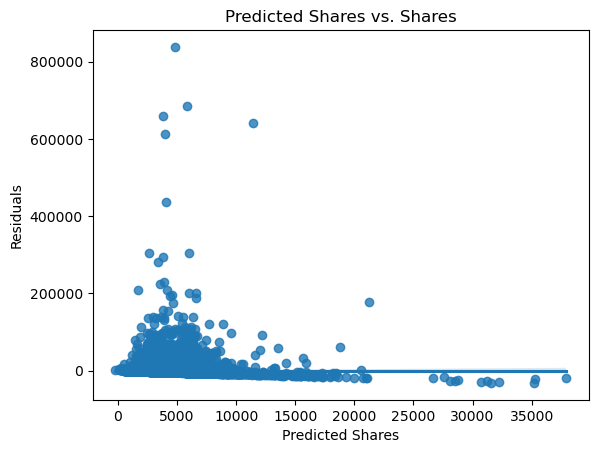

In [46]:
sns.regplot(y=residuals, x=predictions)
plt.title("Predicted Shares vs. Shares")
plt.xlabel("Predicted Shares")
plt.ylabel("Residuals")

### Normality of Residuals

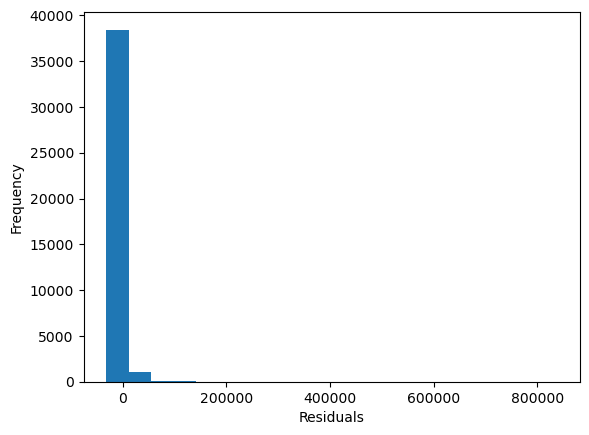

In [47]:
plt.hist(residuals, bins = 20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## E.  Data Summary and Implications

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The regression equation below represents the relationship between the features and dependent variable according to the reduced multiple linear regression model.  The coefficients in the equation represent how much the number of shares will change based on changes in the independent variable.  For example, if the "num_hrefs" (the number of links) increases by 1 then "shares" will increase by 21.3406.  Based on the magnitude of the coefficients, it appears that the features with the most influence are "avg_negative_polarity", "data_channel_is_entertainment", and "weekday_is_thursday".

Shares = 152.9741 + 21.3406(n hrefs) + 25.2583(num_imgs) + 33.6399(num_videos) - 707.0563(data_channel_is_entertainment) + 0.8349(kw_avg_avg) + 0.0187(self_reference_avg_sharess) - 486.5228(weekday_is_tuesday) - 339.1427(weekday_is_wednesday) - 508.3433(weekday_is_thursday) - 439.0935(weekday_is_friday) - 1707.7621(avg_negative_polarity) + 698.4627(abs_title_sentiment_polarity)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the results of the analysis, we cannot reject the null hypothesis.  The variables "n_tokens_title", "n_tokens_content", "num_keywords", and "global_sentiment_polarity" do not have a statistically significant effect on "shares".  The only hypothesized variable that is statistically significant is "num_hrefs".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the output of the reduced model summary, it appears that the model as a whole is statistically significant.  This is because the p-value of the F-statistic is less than the chosen significance level of 0.05.  This means that model fits the data better than a model with no independent variables (Frost).  Although this is promising, there are a few downsides to the final model.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Despite the statistical significance of the model, it performed rather poorly overall.  The adjusted R-squared value of 0.016 indicates that only 1.6% of the variance in the dependent variable can be explained by the independent variables (IBM).  Because the adjusted R-squared is so close to 0, the model has very little predictive value.  From the calculations at the end of the previous section, we can also see that the model has a residual standard error of 11533.10.  This means that the model predicts the number of shares with an average error of 11533.10 which is extremely large considering that the median number of shares is 1400.  These information indicates that the model is simply not a good fit for the data used. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One limitation of the analysis is that linear regression models are prone to outliers.  My decision to retain them in the data exploration phase, may have had a negative impact on model performance.  Although the data points were legitimate and retained to preserve sample size, it is possible that they influenced the slope and intercept of the regression line.  This could explain why the model performed so poorly.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, the data does not meet the assumptions required for linear regression.  From the bivariate visualizations shown earlier, it is apparent that none of the features have a linear relationship with the dependent variable, "shares".  From the residual plot in the previous section, we can see that residuals are concentrated at lower values of "shares".  This violates the assumption regarding the independence of residuals.  Lastly, based the histrogram of the residuals, we can see that they are skewed strongly to the left.  This violates the assumption regarding the normality of the residuals.  Overall, this analysis is limited by each of these factors.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Because of the model's poor performance and the failure of the data to meet the assumptions of linear regession, the model does not have much practical use.  The recommended course of action should be perform another analysis using a different approach.  The first approach would be attempt linear regression again after imputing or removing outliers in the dataset.  Although this could introduce bias in the dataset, it may help the data meet the assumptions required for a meaningful model.  The second approach would be to use the same data with a different type of model such as lasso or ridge regression. These models do not have the same limitations as linear regression and may prove more suitable for the dataset used.  Overall, this course of action may allow a digital media company to obtain more meaningful results and understand what truly drives article shares.

## F.

Miles, S. (2020, June 17). How Do Digital Media Companies Make Money?. Webpublisher Pro. https://webpublisherpro.com/how-do-digital-media-companies-make-money/

Fernandes,Kelwin, Vinagre,Pedro, Cortez,Paulo, and Sernadela,Pedro. (2015). Online News Popularity. UCI Machine Learning Repository. https://doi.org/10.24432/C5NS3V.

Detecting Multicollinearity with VIF – Python (n.d.). GeeksForGeeks. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

Hayes, A. (2024, May 26). Multicollinearity: Meaning, Examples, and FAQs. Investopedia. https://www.investopedia.com/terms/m/multicollinearity.asp

Frost, J. (n.d.). How to Interpret the F-test of Overall Significance in Regression Analysis. Statistics by Jim. https://statisticsbyjim.com/regression/interpret-f-test-overall-significance-regression/

Adjusted R squared. (n.d.). IBM. https://www.ibm.com/docs/en/cognos-analytics/12.0.0?topic=terms-adjusted-r-squared